시청률+코스닥 파일의 위치는 Baseline과 같은 곳에

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
from datetime import datetime
import time

# 행 많이보기
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 한글 폰트 설정
fm.get_fontconfig_fonts()

# fname 옵션을 사용하는 방법
font_location = 'C:\\WINDOWS\\Fonts\\\x7f\x7f\x7f\x7f.TTF' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)
plt.rc('font', size=12)
plt.figure(figsize=(20,10))

# 지수 표현 안보기

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

## 기본 데이터

In [2]:
# 데이터 로드
data = pd.read_excel('./Data/2019_data_time.xlsx', encoding='cp949', header=0, parse_dates=["방송일시"])

## 시청률 데이터

In [3]:
viewrate=pd.read_excel('./Data/시청률 데이터.xlsx',encoding='UTF-8',header=1)

## kosdaq(일별)

In [4]:
name='kosdaq19.01.01_20.08.17(일)'
d=pd.read_excel('./Data/'+name+'.xls',index_col='일자')
kosdaq_day=d.reset_index()

In [5]:
temp=[]
from datetime import datetime
for i in range(len(kosdaq_day)):
    temp.append(datetime.strptime(kosdaq_day['일자'][i], '%Y/%m/%d'))

kosdaq_day['일자_datetime']=temp

kosdaq_day['year']=kosdaq_day['일자_datetime'].apply(lambda x: x.year)
kosdaq_day['month']=kosdaq_day['일자_datetime'].apply(lambda x: x.month)
kosdaq_day['date']=kosdaq_day['일자_datetime'].apply(lambda x: x.day)

In [6]:
kosdaq_day_19=kosdaq_day[kosdaq_day['year']==2019]
kosdaq_day_20=kosdaq_day[kosdaq_day['year']==2020]

In [7]:
#kosdaq_day_19=kosdaq_day_19['']
kosdaq_day_19=kosdaq_day_19[['현재지수','year','month','date']]

# 전처리

In [8]:

temp=[]
from datetime import datetime
for i in range(len(kosdaq_day)):
    temp.append(datetime.strptime(kosdaq_day['일자'][i], '%Y/%m/%d'))

# 무형 제거
data.drop(data[data['상품군']=='무형'].index, inplace=True)
data.reset_index(inplace=True)



# 판매단가, 취급액 쉼표 제거 , int 변환

# data['판매단가'] = data['판매단가'].str.replace(',','').astype(int)
# data['취급액'] = data['취급액'].str.replace(',','').astype(int)
# data['노출(분)'] = data['노출(분)'].astype(int)



# 취급액 결측치 값 변경
# df.loc[df['취급액']==1]['취급액'] = 50000


# 날짜 변경 ( 다음날 데이터를 현재 날짜로 할 건지 )
# data 의 colname 영어로 변경
# index drop 필요
print(data.columns)
data.columns = ['index', 'time', 'exposure_time', 'mcode', 'product_code', 'product_name', 'category','price','salesAMT']
print(data.columns)
                
# M', 'D', 'day', 'H', 'm',
#3
data['yy-mm-dd']=data['time'].apply(lambda time:str(time).split(' ')[0])
data['s-hh-mm']=data['time'].apply(lambda time:str(time).split(' ')[1])
data['s-hh-mm']=data['s-hh-mm'].apply(lambda x: x.split(':')[0]+":"+x.split(':')[1])
data['f-hh-mm']=data['s-hh-mm']

data['year']=data['time'].apply(lambda time:time.year)
data['month']=data['time'].apply(lambda time:time.month)
data['date']=data['time'].apply(lambda time: time.day)

data['hour']=data['time'].apply(lambda time:time.hour)
data['minute']=data['time'].apply(lambda time:time.minute)

data['dayofweek']=data['time'].apply(lambda time:time.dayofweek) # Monday=0, Sunday=6.

Index(['index', '방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액'], dtype='object')
Index(['index', 'time', 'exposure_time', 'mcode', 'product_code',
       'product_name', 'category', 'price', 'salesAMT'],
      dtype='object')


In [ ]:
# 시청률이 해당 일 02:00~01:59(익일)으로 나와있음.
# 00:00~01:59의 시청율이 전날의 00:00~01:59 시청율 이므로
# 하나씩 아래로 밀어서 그 날의 00:00~01:59의 시청율을 구하고, 
# 2019-01-01 00:00~01:59의 경우, 2019-12-31의 시청율로 퉁 침.

viewrate.set_index(viewrate['시간대'], inplace=True)
viewrate.drop(['시간대'],axis=1,inplace=True)
viewrate = viewrate.transpose()

In [48]:
#viewrate.to_excel('./시간대.xlsx')

In [10]:
#print('row(행):',len(viewrate),'\ncolumn(열):',len(viewrate.iloc[0,:]))

nextday시청률=viewrate.loc[:,'00:00':]
nextdaycolumn=nextday시청률.columns
nextdayindex=nextday시청률.index
a=nextday시청률.loc['2019-12-31',:]
a=a.reset_index()
a.drop('시간대',axis=1,inplace=True)
a=a.transpose()
a.columns=nextdaycolumn


nextday시청률=nextday시청률.drop('2019-12-31',axis=0)
nextday시청률=nextday시청률.reset_index()
nextday시청률.drop(['index'],axis=1,inplace=True)


nextday시청률=pd.concat([a,nextday시청률],axis=0)
nextday시청률=nextday시청률.reset_index()
nextday시청률.drop('index',axis=1,inplace=True)
nextday시청률=nextday시청률.set_index(nextdayindex)

In [11]:
# 드롭을 하지 말고, 00:00~01:59 데이터의 경우 column명에 +24를 해서 보존하자
plus24=viewrate.loc[:,'00:00':].columns

notplus24=viewrate.loc[:,:'23:59'].columns #inex type
notplus24=list(notplus24) # list형태로 변환


plus24result=[]
for i in range(len(plus24)-1):
   
    hour=int(plus24[i].split(':')[0])+24
    minute=int(plus24[i].split(':')[1])
    string='{0:02d}'.format(hour)+':'+'{0:02d}'.format(minute)
    plus24result.append(string)
plus24result.append(plus24[-1])
newcolumn=notplus24+plus24result

In [12]:
viewrate.columns=newcolumn

In [13]:
viewrate=pd.concat([nextday시청률,viewrate],axis=1)
시청률unstack=viewrate.transpose().unstack()
#시청률unstack['2019-01-02']['01:59']
시청률unstack

2019-01-01                00:00                 0.024
                          00:01                 0.024
                          00:02                 0.024
                          00:03                 0.024
                          00:04                 0.024
                                                ...  
2019-01-01 to 2019-12-31  25:56                 0.004
                          25:57                 0.004
                          25:58                 0.004
                          25:59                 0.004
                          월화수목금토일02:00-01:59    0.004
Length: 571692, dtype: float64

In [14]:
# 끝난 시각 만들기
finishtime=[]
for i in range(len(data)):
    wdate=data.iloc[i,9]#년-월-일
    wstime=data.iloc[i,10]#s-hh-mm
    wduring=data.iloc[i,2]#exposure_time
    
    plushour,finishmin=divmod(int(wstime.split(':')[1])+int(wduring),60)#분끼리 더해서 60을 넘으면, 시간으로 반올림
    finishhour=int(wstime.split(':')[0])+int(plushour)
    #a,finishhour=divmod(finishhour,24)#24==0 바꾸는 작업
    
    finishtime.append('{0:02d}'.format(finishhour)+':'+'{0:02d}'.format(finishmin)) #2.6이상

data['f-hh-mm']=finishtime

#시청률unstack['2019-01-01']['02:00':'02:20'].sum()


In [15]:
시청률_sumlist=[]
for i in range(len(data)):
    wdate=data.iloc[i,9]#년-월-일
    wstime=data.iloc[i,10]#시작시각
    wftime=data.iloc[i,11]#끝시각
    print(wdate,wstime,wftime)
    if wdate=='2020-01-01':
        wdate='2019-12-31'
        wstime='24:00'
        wftime='24:20'
    else:
        None
    시청률_sumlist.append(시청률unstack[wdate][wstime:wftime].sum())

data['tvrate']=시청률_sumlist

2019-01-01 06:00 06:20
2019-01-01 06:00 06:20
2019-01-01 06:20 06:40
2019-01-01 06:20 06:40
2019-01-01 06:40 07:00
2019-01-01 06:40 07:00
2019-01-01 07:00 07:20
2019-01-01 07:20 07:40
2019-01-01 07:40 08:00
2019-01-01 08:00 08:20
2019-01-01 08:20 08:40
2019-01-01 08:40 09:00
2019-01-01 09:00 09:20
2019-01-01 09:20 09:40
2019-01-01 09:40 10:00
2019-01-01 10:00 10:20
2019-01-01 10:20 10:40
2019-01-01 10:40 11:00
2019-01-01 11:00 11:20
2019-01-01 11:20 11:40
2019-01-01 12:00 12:20
2019-01-01 12:20 12:40
2019-01-01 12:40 13:00
2019-01-01 13:00 13:30
2019-01-01 13:30 14:00
2019-01-01 14:00 14:30
2019-01-01 14:00 14:30
2019-01-01 14:30 15:00
2019-01-01 14:30 15:00
2019-01-01 15:00 15:20
2019-01-01 15:20 15:40
2019-01-01 15:40 16:00
2019-01-01 16:00 16:20
2019-01-01 16:20 16:40
2019-01-01 16:40 17:00
2019-01-01 17:00 17:20
2019-01-01 17:20 17:40
2019-01-01 17:40 18:00
2019-01-01 18:00 18:20
2019-01-01 18:20 18:40
2019-01-01 18:40 19:00
2019-01-01 19:00 19:20
2019-01-01 19:20 19:40
2019-01-01 

2019-01-05 14:00 14:20
2019-01-05 14:20 14:40
2019-01-05 14:20 14:40
2019-01-05 14:40 15:00
2019-01-05 14:40 15:00
2019-01-05 15:00 15:30
2019-01-05 15:30 16:00
2019-01-05 16:00 16:20
2019-01-05 16:20 16:40
2019-01-05 16:40 17:00
2019-01-05 17:00 17:20
2019-01-05 17:20 17:40
2019-01-05 17:40 18:00
2019-01-05 18:20 18:40
2019-01-05 18:40 19:00
2019-01-05 19:00 19:20
2019-01-05 19:00 19:20
2019-01-05 19:00 19:20
2019-01-05 19:00 19:20
2019-01-05 19:20 19:40
2019-01-05 19:20 19:40
2019-01-05 19:20 19:40
2019-01-05 19:20 19:40
2019-01-05 19:40 20:00
2019-01-05 19:40 20:00
2019-01-05 19:40 20:00
2019-01-05 19:40 20:00
2019-01-05 20:00 20:20
2019-01-05 20:00 20:20
2019-01-05 20:00 20:20
2019-01-05 20:20 20:40
2019-01-05 20:20 20:40
2019-01-05 20:20 20:40
2019-01-05 20:40 21:00
2019-01-05 20:40 21:00
2019-01-05 20:40 21:00
2019-01-05 21:00 21:20
2019-01-05 21:00 21:20
2019-01-05 21:00 21:20
2019-01-05 21:00 21:20
2019-01-05 21:00 21:20
2019-01-05 21:00 21:20
2019-01-05 21:20 21:40
2019-01-05 

2019-01-09 13:40 14:00
2019-01-09 14:00 14:20
2019-01-09 14:20 14:40
2019-01-09 14:40 15:00
2019-01-09 15:00 15:20
2019-01-09 15:20 15:40
2019-01-09 15:40 16:00
2019-01-09 16:00 16:20
2019-01-09 16:20 16:40
2019-01-09 16:40 17:00
2019-01-09 17:00 17:20
2019-01-09 17:20 17:40
2019-01-09 17:40 18:00
2019-01-09 18:00 18:20
2019-01-09 18:20 18:40
2019-01-09 18:40 19:00
2019-01-09 19:00 19:20
2019-01-09 19:00 19:20
2019-01-09 19:20 19:40
2019-01-09 19:20 19:40
2019-01-09 19:40 20:00
2019-01-09 19:40 20:00
2019-01-09 20:00 20:20
2019-01-09 20:20 20:40
2019-01-09 20:40 21:00
2019-01-09 21:00 21:20
2019-01-09 21:20 21:40
2019-01-09 21:40 22:00
2019-01-09 22:00 22:30
2019-01-09 22:30 23:00
2019-01-09 23:00 23:20
2019-01-09 23:20 23:40
2019-01-09 23:40 24:00
2019-01-10 00:00 00:20
2019-01-10 00:20 00:40
2019-01-10 00:40 01:00
2019-01-10 01:00 01:20
2019-01-10 01:20 01:40
2019-01-10 01:40 01:57
2019-01-10 06:00 06:20
2019-01-10 06:00 06:20
2019-01-10 06:20 06:40
2019-01-10 06:20 06:40
2019-01-10 

2019-01-13 11:20 11:40
2019-01-13 11:40 12:00
2019-01-13 11:40 12:00
2019-01-13 11:40 12:00
2019-01-13 11:40 12:00
2019-01-13 12:00 12:20
2019-01-13 12:20 12:40
2019-01-13 12:40 13:00
2019-01-13 13:00 13:20
2019-01-13 13:00 13:20
2019-01-13 13:20 13:40
2019-01-13 13:20 13:40
2019-01-13 13:40 14:00
2019-01-13 13:40 14:00
2019-01-13 14:00 14:30
2019-01-13 14:30 15:00
2019-01-13 15:00 15:30
2019-01-13 15:30 16:00
2019-01-13 16:00 16:20
2019-01-13 16:20 16:40
2019-01-13 16:40 17:00
2019-01-13 17:00 17:20
2019-01-13 17:20 17:40
2019-01-13 17:40 18:00
2019-01-13 18:00 18:20
2019-01-13 18:00 18:20
2019-01-13 18:00 18:20
2019-01-13 18:00 18:20
2019-01-13 18:20 18:40
2019-01-13 18:20 18:40
2019-01-13 18:20 18:40
2019-01-13 18:20 18:40
2019-01-13 18:40 19:00
2019-01-13 18:40 19:00
2019-01-13 18:40 19:00
2019-01-13 18:40 19:00
2019-01-13 19:00 19:20
2019-01-13 19:00 19:20
2019-01-13 19:20 19:40
2019-01-13 19:20 19:40
2019-01-13 19:40 20:00
2019-01-13 19:40 20:00
2019-01-13 20:00 20:20
2019-01-13 

2019-01-17 06:40 07:00
2019-01-17 06:40 07:00
2019-01-17 07:00 07:20
2019-01-17 07:00 07:20
2019-01-17 07:20 07:40
2019-01-17 07:20 07:40
2019-01-17 07:40 08:00
2019-01-17 07:40 08:00
2019-01-17 08:00 08:20
2019-01-17 08:20 08:40
2019-01-17 08:40 09:00
2019-01-17 09:00 09:20
2019-01-17 09:20 09:40
2019-01-17 09:40 10:00
2019-01-17 10:00 10:20
2019-01-17 10:00 10:20
2019-01-17 10:20 10:40
2019-01-17 10:20 10:40
2019-01-17 10:40 11:00
2019-01-17 10:40 11:00
2019-01-17 11:00 11:20
2019-01-17 11:20 11:40
2019-01-17 11:40 12:00
2019-01-17 12:00 12:20
2019-01-17 12:20 12:40
2019-01-17 12:40 13:00
2019-01-17 13:00 13:20
2019-01-17 13:00 13:20
2019-01-17 13:20 13:40
2019-01-17 13:20 13:40
2019-01-17 13:40 14:00
2019-01-17 13:40 14:00
2019-01-17 14:00 14:30
2019-01-17 14:30 15:00
2019-01-17 15:00 15:20
2019-01-17 15:20 15:40
2019-01-17 15:40 16:00
2019-01-17 16:00 16:20
2019-01-17 16:20 16:40
2019-01-17 16:40 17:00
2019-01-17 17:00 17:30
2019-01-17 17:30 18:00
2019-01-17 18:00 18:20
2019-01-17 

2019-01-20 20:40 21:00
2019-01-20 21:00 21:20
2019-01-20 21:00 21:20
2019-01-20 21:00 21:20
2019-01-20 21:00 21:20
2019-01-20 21:20 21:40
2019-01-20 21:20 21:40
2019-01-20 21:20 21:40
2019-01-20 21:20 21:40
2019-01-20 21:40 22:00
2019-01-20 21:40 22:00
2019-01-20 21:40 22:00
2019-01-20 21:40 22:00
2019-01-20 22:00 22:20
2019-01-20 22:00 22:20
2019-01-20 22:00 22:20
2019-01-20 22:00 22:20
2019-01-20 22:00 22:20
2019-01-20 22:00 22:20
2019-01-20 22:20 22:40
2019-01-20 22:20 22:40
2019-01-20 22:20 22:40
2019-01-20 22:20 22:40
2019-01-20 22:20 22:40
2019-01-20 22:20 22:40
2019-01-20 22:40 23:00
2019-01-20 22:40 23:00
2019-01-20 22:40 23:00
2019-01-20 22:40 23:00
2019-01-20 22:40 23:00
2019-01-20 22:40 23:00
2019-01-20 23:00 23:20
2019-01-20 23:20 23:40
2019-01-20 23:40 24:00
2019-01-21 00:00 00:20
2019-01-21 00:20 00:40
2019-01-21 00:40 01:00
2019-01-21 01:00 01:20
2019-01-21 01:20 01:40
2019-01-21 01:40 01:56
2019-01-21 06:00 06:20
2019-01-21 06:20 06:40
2019-01-21 06:40 07:00
2019-01-21 

2019-01-24 15:00 15:20
2019-01-24 15:20 15:40
2019-01-24 15:40 16:00
2019-01-24 16:00 16:20
2019-01-24 16:20 16:40
2019-01-24 16:40 17:00
2019-01-24 17:00 17:20
2019-01-24 17:20 17:40
2019-01-24 17:40 18:00
2019-01-24 18:00 18:20
2019-01-24 18:20 18:40
2019-01-24 18:40 19:00
2019-01-24 19:00 19:20
2019-01-24 19:20 19:40
2019-01-24 19:40 20:00
2019-01-24 20:00 20:20
2019-01-24 20:00 20:20
2019-01-24 20:00 20:20
2019-01-24 20:00 20:20
2019-01-24 20:00 20:20
2019-01-24 20:00 20:20
2019-01-24 20:20 20:40
2019-01-24 20:20 20:40
2019-01-24 20:20 20:40
2019-01-24 20:20 20:40
2019-01-24 20:20 20:40
2019-01-24 20:20 20:40
2019-01-24 20:40 21:00
2019-01-24 20:40 21:00
2019-01-24 20:40 21:00
2019-01-24 20:40 21:00
2019-01-24 20:40 21:00
2019-01-24 20:40 21:00
2019-01-24 21:00 21:20
2019-01-24 21:00 21:20
2019-01-24 21:00 21:20
2019-01-24 21:00 21:20
2019-01-24 21:20 21:40
2019-01-24 21:20 21:40
2019-01-24 21:20 21:40
2019-01-24 21:20 21:40
2019-01-24 21:40 22:00
2019-01-24 21:40 22:00
2019-01-24 

2019-01-28 18:00 18:20
2019-01-28 18:20 18:40
2019-01-28 18:40 19:00
2019-01-28 19:00 19:20
2019-01-28 19:20 19:40
2019-01-28 19:40 20:00
2019-01-28 20:00 20:20
2019-01-28 20:00 20:20
2019-01-28 20:20 20:40
2019-01-28 20:20 20:40
2019-01-28 20:40 21:00
2019-01-28 20:40 21:00
2019-01-28 21:00 21:20
2019-01-28 21:20 21:40
2019-01-28 21:40 22:00
2019-01-28 22:00 22:20
2019-01-28 22:00 22:20
2019-01-28 22:00 22:20
2019-01-28 22:00 22:20
2019-01-28 22:20 22:40
2019-01-28 22:20 22:40
2019-01-28 22:20 22:40
2019-01-28 22:20 22:40
2019-01-28 22:40 23:00
2019-01-28 22:40 23:00
2019-01-28 22:40 23:00
2019-01-28 22:40 23:00
2019-01-28 23:00 23:20
2019-01-28 23:20 23:40
2019-01-28 23:40 24:00
2019-01-29 00:00 00:20
2019-01-29 00:00 00:20
2019-01-29 00:20 00:40
2019-01-29 00:20 00:40
2019-01-29 00:40 01:00
2019-01-29 00:40 01:00
2019-01-29 01:00 01:20
2019-01-29 01:00 01:20
2019-01-29 01:20 01:40
2019-01-29 01:20 01:40
2019-01-29 01:40 01:56
2019-01-29 01:40 01:56
2019-01-29 06:00 06:30
2019-01-29 

2019-02-01 20:20 20:40
2019-02-01 20:20 20:40
2019-02-01 20:40 21:00
2019-02-01 20:40 21:00
2019-02-01 21:00 21:20
2019-02-01 21:00 21:20
2019-02-01 21:20 21:40
2019-02-01 21:20 21:40
2019-02-01 21:40 22:00
2019-02-01 21:40 22:00
2019-02-01 22:00 22:20
2019-02-01 22:00 22:20
2019-02-01 22:00 22:20
2019-02-01 22:20 22:40
2019-02-01 22:20 22:40
2019-02-01 22:20 22:40
2019-02-01 22:40 23:00
2019-02-01 22:40 23:00
2019-02-01 22:40 23:00
2019-02-01 23:00 23:20
2019-02-01 23:20 23:40
2019-02-01 23:40 24:00
2019-02-02 00:00 00:20
2019-02-02 00:00 00:20
2019-02-02 00:20 00:40
2019-02-02 00:20 00:40
2019-02-02 00:40 01:00
2019-02-02 00:40 01:00
2019-02-02 01:00 01:20
2019-02-02 01:00 01:20
2019-02-02 01:20 01:40
2019-02-02 01:20 01:40
2019-02-02 01:40 01:56
2019-02-02 01:40 01:56
2019-02-02 06:00 06:20
2019-02-02 06:20 06:40
2019-02-02 06:40 07:00
2019-02-02 07:00 07:20
2019-02-02 07:20 07:40
2019-02-02 07:40 08:00
2019-02-02 08:00 08:20
2019-02-02 08:20 08:40
2019-02-02 08:40 09:00
2019-02-02 

2019-02-05 14:20 14:40
2019-02-05 14:20 14:40
2019-02-05 14:20 14:40
2019-02-05 14:40 15:00
2019-02-05 14:40 15:00
2019-02-05 14:40 15:00
2019-02-05 15:00 15:20
2019-02-05 15:00 15:20
2019-02-05 15:20 15:40
2019-02-05 15:20 15:40
2019-02-05 15:40 16:00
2019-02-05 15:40 16:00
2019-02-05 16:00 16:20
2019-02-05 16:20 16:40
2019-02-05 16:40 17:00
2019-02-05 17:00 17:20
2019-02-05 17:20 17:40
2019-02-05 17:40 18:00
2019-02-05 19:00 19:20
2019-02-05 19:00 19:20
2019-02-05 19:00 19:20
2019-02-05 19:00 19:20
2019-02-05 19:20 19:40
2019-02-05 19:20 19:40
2019-02-05 19:20 19:40
2019-02-05 19:20 19:40
2019-02-05 19:40 20:00
2019-02-05 19:40 20:00
2019-02-05 19:40 20:00
2019-02-05 19:40 20:00
2019-02-05 20:00 20:20
2019-02-05 20:00 20:20
2019-02-05 20:00 20:20
2019-02-05 20:00 20:20
2019-02-05 20:00 20:20
2019-02-05 20:00 20:20
2019-02-05 20:20 20:40
2019-02-05 20:20 20:40
2019-02-05 20:20 20:40
2019-02-05 20:20 20:40
2019-02-05 20:20 20:40
2019-02-05 20:20 20:40
2019-02-05 20:40 21:00
2019-02-05 

2019-02-08 21:40 22:00
2019-02-08 22:00 22:20
2019-02-08 22:00 22:20
2019-02-08 22:20 22:40
2019-02-08 22:20 22:40
2019-02-08 22:40 23:00
2019-02-08 22:40 23:00
2019-02-08 23:00 23:20
2019-02-08 23:20 23:40
2019-02-08 23:40 24:00
2019-02-09 00:00 00:20
2019-02-09 00:00 00:20
2019-02-09 00:20 00:40
2019-02-09 00:20 00:40
2019-02-09 00:40 01:00
2019-02-09 00:40 01:00
2019-02-09 01:00 01:20
2019-02-09 01:20 01:40
2019-02-09 01:40 01:56
2019-02-09 06:00 06:20
2019-02-09 06:20 06:40
2019-02-09 06:40 07:00
2019-02-09 07:00 07:30
2019-02-09 07:30 08:00
2019-02-09 08:00 08:20
2019-02-09 08:20 08:40
2019-02-09 08:40 09:00
2019-02-09 09:00 09:20
2019-02-09 09:20 09:40
2019-02-09 09:40 10:00
2019-02-09 10:00 10:20
2019-02-09 10:20 10:40
2019-02-09 10:40 11:00
2019-02-09 11:00 11:20
2019-02-09 11:20 11:40
2019-02-09 11:40 12:00
2019-02-09 12:00 12:20
2019-02-09 12:00 12:20
2019-02-09 12:00 12:20
2019-02-09 12:00 12:20
2019-02-09 12:20 12:40
2019-02-09 12:20 12:40
2019-02-09 12:20 12:40
2019-02-09 

2019-02-12 22:00 22:20
2019-02-12 22:20 22:40
2019-02-12 22:40 23:00
2019-02-12 23:00 23:20
2019-02-12 23:00 23:20
2019-02-12 23:00 23:20
2019-02-12 23:00 23:20
2019-02-12 23:00 23:20
2019-02-12 23:00 23:20
2019-02-12 23:20 23:40
2019-02-12 23:20 23:40
2019-02-12 23:20 23:40
2019-02-12 23:20 23:40
2019-02-12 23:20 23:40
2019-02-12 23:20 23:40
2019-02-12 23:40 24:00
2019-02-12 23:40 24:00
2019-02-12 23:40 24:00
2019-02-12 23:40 24:00
2019-02-12 23:40 24:00
2019-02-12 23:40 24:00
2019-02-13 00:00 00:20
2019-02-13 00:20 00:40
2019-02-13 00:40 01:00
2019-02-13 01:00 01:20
2019-02-13 01:20 01:40
2019-02-13 01:40 01:56
2019-02-13 06:00 06:20
2019-02-13 06:20 06:40
2019-02-13 06:40 07:00
2019-02-13 07:00 07:20
2019-02-13 07:00 07:20
2019-02-13 07:20 07:40
2019-02-13 07:20 07:40
2019-02-13 07:40 08:00
2019-02-13 07:40 08:00
2019-02-13 08:00 08:30
2019-02-13 08:30 09:00
2019-02-13 09:00 09:20
2019-02-13 09:20 09:40
2019-02-13 09:40 10:00
2019-02-13 10:00 10:20
2019-02-13 10:00 10:20
2019-02-13 

2019-02-16 07:40 08:00
2019-02-16 08:00 08:20
2019-02-16 08:20 08:40
2019-02-16 08:40 09:00
2019-02-16 09:00 09:20
2019-02-16 09:20 09:40
2019-02-16 09:40 10:00
2019-02-16 10:00 10:20
2019-02-16 10:00 10:20
2019-02-16 10:00 10:20
2019-02-16 10:00 10:20
2019-02-16 10:20 10:40
2019-02-16 10:20 10:40
2019-02-16 10:20 10:40
2019-02-16 10:20 10:40
2019-02-16 10:40 11:00
2019-02-16 10:40 11:00
2019-02-16 10:40 11:00
2019-02-16 10:40 11:00
2019-02-16 11:00 11:20
2019-02-16 11:20 11:40
2019-02-16 11:40 12:00
2019-02-16 12:00 12:20
2019-02-16 12:20 12:40
2019-02-16 12:40 13:00
2019-02-16 13:00 13:20
2019-02-16 13:20 13:40
2019-02-16 13:40 14:00
2019-02-16 14:00 14:20
2019-02-16 14:20 14:40
2019-02-16 14:40 15:00
2019-02-16 15:00 15:20
2019-02-16 15:20 15:40
2019-02-16 15:40 16:00
2019-02-16 16:00 16:20
2019-02-16 16:20 16:40
2019-02-16 16:40 17:00
2019-02-16 17:00 17:20
2019-02-16 17:20 17:40
2019-02-16 17:40 18:00
2019-02-16 18:20 18:40
2019-02-16 18:40 19:00
2019-02-16 19:00 19:20
2019-02-16 

2019-02-19 20:20 20:40
2019-02-19 20:20 20:40
2019-02-19 20:40 21:00
2019-02-19 20:40 21:00
2019-02-19 20:40 21:00
2019-02-19 21:00 21:20
2019-02-19 21:00 21:20
2019-02-19 21:20 21:40
2019-02-19 21:20 21:40
2019-02-19 21:40 22:00
2019-02-19 21:40 22:00
2019-02-19 22:00 22:20
2019-02-19 22:00 22:20
2019-02-19 22:00 22:20
2019-02-19 22:00 22:20
2019-02-19 22:00 22:20
2019-02-19 22:00 22:20
2019-02-19 22:20 22:40
2019-02-19 22:20 22:40
2019-02-19 22:20 22:40
2019-02-19 22:20 22:40
2019-02-19 22:20 22:40
2019-02-19 22:20 22:40
2019-02-19 22:40 23:00
2019-02-19 22:40 23:00
2019-02-19 22:40 23:00
2019-02-19 22:40 23:00
2019-02-19 22:40 23:00
2019-02-19 22:40 23:00
2019-02-19 23:00 23:20
2019-02-19 23:20 23:40
2019-02-19 23:40 24:00
2019-02-20 00:00 00:20
2019-02-20 00:20 00:40
2019-02-20 00:40 01:00
2019-02-20 01:00 01:20
2019-02-20 01:00 01:20
2019-02-20 01:00 01:20
2019-02-20 01:20 01:40
2019-02-20 01:20 01:40
2019-02-20 01:20 01:40
2019-02-20 01:40 01:56
2019-02-20 01:40 01:56
2019-02-20 

2019-02-23 10:40 11:00
2019-02-23 11:00 11:20
2019-02-23 11:20 11:40
2019-02-23 11:40 12:00
2019-02-23 12:00 12:20
2019-02-23 12:20 12:40
2019-02-23 12:40 13:00
2019-02-23 13:00 13:20
2019-02-23 13:20 13:40
2019-02-23 13:40 14:00
2019-02-23 14:00 14:20
2019-02-23 14:20 14:40
2019-02-23 14:40 15:00
2019-02-23 15:00 15:20
2019-02-23 15:20 15:40
2019-02-23 15:40 16:00
2019-02-23 16:00 16:20
2019-02-23 16:20 16:40
2019-02-23 16:40 17:00
2019-02-23 17:00 17:20
2019-02-23 17:20 17:40
2019-02-23 17:40 18:00
2019-02-23 18:20 18:40
2019-02-23 18:40 19:00
2019-02-23 19:00 19:20
2019-02-23 19:20 19:40
2019-02-23 19:40 20:00
2019-02-23 20:00 20:20
2019-02-23 20:20 20:40
2019-02-23 20:40 21:00
2019-02-23 21:00 21:20
2019-02-23 21:00 21:20
2019-02-23 21:20 21:40
2019-02-23 21:20 21:40
2019-02-23 21:40 22:00
2019-02-23 21:40 22:00
2019-02-23 22:00 22:20
2019-02-23 22:00 22:20
2019-02-23 22:00 22:20
2019-02-23 22:00 22:20
2019-02-23 22:00 22:20
2019-02-23 22:00 22:20
2019-02-23 22:20 22:40
2019-02-23 

2019-02-27 06:20 06:40
2019-02-27 06:40 07:00
2019-02-27 07:00 07:30
2019-02-27 07:30 08:00
2019-02-27 08:00 08:20
2019-02-27 08:20 08:40
2019-02-27 08:40 09:00
2019-02-27 09:00 09:20
2019-02-27 09:20 09:40
2019-02-27 09:40 10:00
2019-02-27 10:00 10:20
2019-02-27 10:20 10:40
2019-02-27 10:40 11:00
2019-02-27 11:00 11:20
2019-02-27 11:20 11:40
2019-02-27 11:40 12:00
2019-02-27 12:00 12:20
2019-02-27 12:20 12:40
2019-02-27 12:40 13:00
2019-02-27 13:00 13:20
2019-02-27 13:20 13:40
2019-02-27 13:40 14:00
2019-02-27 14:00 14:20
2019-02-27 14:20 14:40
2019-02-27 14:40 15:00
2019-02-27 15:00 15:20
2019-02-27 15:20 15:40
2019-02-27 15:40 16:00
2019-02-27 16:00 16:20
2019-02-27 16:20 16:40
2019-02-27 16:40 17:00
2019-02-27 17:00 17:20
2019-02-27 17:20 17:40
2019-02-27 17:40 18:00
2019-02-27 18:00 18:20
2019-02-27 18:20 18:40
2019-02-27 18:40 19:00
2019-02-27 19:00 19:20
2019-02-27 19:20 19:40
2019-02-27 19:40 20:00
2019-02-27 20:00 20:20
2019-02-27 20:20 20:40
2019-02-27 20:40 21:00
2019-02-27 

2019-03-02 19:40 20:00
2019-03-02 20:00 20:20
2019-03-02 20:00 20:20
2019-03-02 20:00 20:20
2019-03-02 20:00 20:20
2019-03-02 20:00 20:20
2019-03-02 20:00 20:20
2019-03-02 20:20 20:40
2019-03-02 20:20 20:40
2019-03-02 20:20 20:40
2019-03-02 20:20 20:40
2019-03-02 20:20 20:40
2019-03-02 20:20 20:40
2019-03-02 20:40 21:00
2019-03-02 20:40 21:00
2019-03-02 20:40 21:00
2019-03-02 20:40 21:00
2019-03-02 20:40 21:00
2019-03-02 20:40 21:00
2019-03-02 21:00 21:20
2019-03-02 21:00 21:20
2019-03-02 21:20 21:40
2019-03-02 21:20 21:40
2019-03-02 21:40 22:00
2019-03-02 21:40 22:00
2019-03-02 22:00 22:20
2019-03-02 22:00 22:20
2019-03-02 22:00 22:20
2019-03-02 22:00 22:20
2019-03-02 22:00 22:20
2019-03-02 22:00 22:20
2019-03-02 22:20 22:40
2019-03-02 22:20 22:40
2019-03-02 22:20 22:40
2019-03-02 22:20 22:40
2019-03-02 22:20 22:40
2019-03-02 22:20 22:40
2019-03-02 22:40 23:00
2019-03-02 22:40 23:00
2019-03-02 22:40 23:00
2019-03-02 22:40 23:00
2019-03-02 22:40 23:00
2019-03-02 22:40 23:00
2019-03-02 

2019-03-05 22:00 22:20
2019-03-05 22:20 22:40
2019-03-05 22:20 22:40
2019-03-05 22:20 22:40
2019-03-05 22:40 23:00
2019-03-05 22:40 23:00
2019-03-05 22:40 23:00
2019-03-05 23:00 23:20
2019-03-05 23:20 23:40
2019-03-05 23:40 24:00
2019-03-06 00:00 00:20
2019-03-06 00:20 00:40
2019-03-06 00:40 01:00
2019-03-06 01:00 01:20
2019-03-06 01:00 01:20
2019-03-06 01:20 01:40
2019-03-06 01:20 01:40
2019-03-06 01:40 01:56
2019-03-06 01:40 01:56
2019-03-06 06:00 06:20
2019-03-06 06:20 06:40
2019-03-06 06:40 07:00
2019-03-06 07:00 07:20
2019-03-06 07:20 07:40
2019-03-06 07:40 08:00
2019-03-06 08:00 08:20
2019-03-06 08:20 08:40
2019-03-06 08:40 09:00
2019-03-06 09:00 09:20
2019-03-06 09:20 09:40
2019-03-06 09:40 10:00
2019-03-06 10:00 10:20
2019-03-06 10:20 10:40
2019-03-06 10:40 11:00
2019-03-06 11:00 11:20
2019-03-06 11:00 11:20
2019-03-06 11:00 11:20
2019-03-06 11:00 11:20
2019-03-06 11:20 11:40
2019-03-06 11:20 11:40
2019-03-06 11:20 11:40
2019-03-06 11:20 11:40
2019-03-06 11:40 12:00
2019-03-06 

2019-03-09 16:00 16:20
2019-03-09 16:00 16:20
2019-03-09 16:20 16:40
2019-03-09 16:20 16:40
2019-03-09 16:40 17:00
2019-03-09 16:40 17:00
2019-03-09 17:00 17:20
2019-03-09 17:20 17:40
2019-03-09 17:40 18:00
2019-03-09 19:20 19:40
2019-03-09 19:40 20:00
2019-03-09 20:00 20:20
2019-03-09 20:20 20:40
2019-03-09 20:20 20:40
2019-03-09 20:20 20:40
2019-03-09 20:40 21:00
2019-03-09 20:40 21:00
2019-03-09 20:40 21:00
2019-03-09 21:00 21:20
2019-03-09 21:00 21:20
2019-03-09 21:00 21:20
2019-03-09 21:20 21:40
2019-03-09 21:20 21:40
2019-03-09 21:20 21:40
2019-03-09 21:20 21:40
2019-03-09 21:20 21:40
2019-03-09 21:20 21:40
2019-03-09 21:40 22:00
2019-03-09 21:40 22:00
2019-03-09 21:40 22:00
2019-03-09 21:40 22:00
2019-03-09 21:40 22:00
2019-03-09 21:40 22:00
2019-03-09 22:00 22:20
2019-03-09 22:00 22:20
2019-03-09 22:00 22:20
2019-03-09 22:00 22:20
2019-03-09 22:00 22:20
2019-03-09 22:00 22:20
2019-03-09 22:20 22:40
2019-03-09 22:40 23:00
2019-03-09 23:00 23:20
2019-03-10 01:20 01:40
2019-03-10 

2019-03-13 01:00 01:20
2019-03-13 01:00 01:20
2019-03-13 01:20 01:40
2019-03-13 01:20 01:40
2019-03-13 01:40 01:56
2019-03-13 01:40 01:56
2019-03-13 06:00 06:20
2019-03-13 06:00 06:20
2019-03-13 06:20 06:40
2019-03-13 06:20 06:40
2019-03-13 06:40 07:00
2019-03-13 06:40 07:00
2019-03-13 07:00 07:20
2019-03-13 07:20 07:40
2019-03-13 07:40 08:00
2019-03-13 08:00 08:20
2019-03-13 08:00 08:20
2019-03-13 08:00 08:20
2019-03-13 08:00 08:20
2019-03-13 08:20 08:40
2019-03-13 08:20 08:40
2019-03-13 08:20 08:40
2019-03-13 08:20 08:40
2019-03-13 08:40 09:00
2019-03-13 08:40 09:00
2019-03-13 08:40 09:00
2019-03-13 08:40 09:00
2019-03-13 09:00 09:20
2019-03-13 09:20 09:40
2019-03-13 09:40 10:00
2019-03-13 10:00 10:20
2019-03-13 10:00 10:20
2019-03-13 10:20 10:40
2019-03-13 10:20 10:40
2019-03-13 10:40 11:00
2019-03-13 10:40 11:00
2019-03-13 11:00 11:20
2019-03-13 11:20 11:40
2019-03-13 11:40 12:00
2019-03-13 12:00 12:20
2019-03-13 12:00 12:20
2019-03-13 12:20 12:40
2019-03-13 12:20 12:40
2019-03-13 

2019-03-16 14:20 14:40
2019-03-16 14:40 15:00
2019-03-16 14:40 15:00
2019-03-16 15:00 15:20
2019-03-16 15:00 15:20
2019-03-16 15:20 15:40
2019-03-16 15:20 15:40
2019-03-16 15:40 16:00
2019-03-16 15:40 16:00
2019-03-16 16:00 16:20
2019-03-16 16:20 16:40
2019-03-16 16:40 17:00
2019-03-16 17:00 17:20
2019-03-16 17:20 17:40
2019-03-16 17:40 18:00
2019-03-16 19:20 19:40
2019-03-16 19:40 20:00
2019-03-16 20:00 20:20
2019-03-16 20:20 20:40
2019-03-16 20:20 20:40
2019-03-16 20:40 21:00
2019-03-16 20:40 21:00
2019-03-16 21:00 21:20
2019-03-16 21:00 21:20
2019-03-16 21:20 21:50
2019-03-16 21:20 21:50
2019-03-16 21:50 22:20
2019-03-16 21:50 22:20
2019-03-16 22:20 22:40
2019-03-16 22:20 22:40
2019-03-16 22:20 22:40
2019-03-16 22:20 22:40
2019-03-16 22:40 23:00
2019-03-16 22:40 23:00
2019-03-16 22:40 23:00
2019-03-16 22:40 23:00
2019-03-16 23:00 23:20
2019-03-16 23:00 23:20
2019-03-16 23:00 23:20
2019-03-16 23:00 23:20
2019-03-16 23:20 23:40
2019-03-16 23:40 24:00
2019-03-17 00:00 00:20
2019-03-17 

2019-03-20 07:20 07:40
2019-03-20 07:40 08:00
2019-03-20 08:00 08:20
2019-03-20 08:00 08:20
2019-03-20 08:00 08:20
2019-03-20 08:00 08:20
2019-03-20 08:20 08:40
2019-03-20 08:20 08:40
2019-03-20 08:20 08:40
2019-03-20 08:40 09:00
2019-03-20 08:40 09:00
2019-03-20 08:40 09:00
2019-03-20 08:40 09:00
2019-03-20 09:00 09:20
2019-03-20 09:20 09:40
2019-03-20 09:40 10:00
2019-03-20 10:00 10:20
2019-03-20 10:20 10:40
2019-03-20 10:40 11:00
2019-03-20 11:00 11:20
2019-03-20 11:00 11:20
2019-03-20 11:20 11:40
2019-03-20 11:20 11:40
2019-03-20 11:40 12:00
2019-03-20 11:40 12:00
2019-03-20 12:00 12:20
2019-03-20 12:20 12:40
2019-03-20 12:40 13:00
2019-03-20 13:00 13:30
2019-03-20 13:00 13:30
2019-03-20 13:30 14:00
2019-03-20 13:30 14:00
2019-03-20 14:00 14:20
2019-03-20 14:20 14:40
2019-03-20 14:40 15:00
2019-03-20 15:00 15:20
2019-03-20 15:20 15:40
2019-03-20 15:40 16:00
2019-03-20 16:00 16:20
2019-03-20 16:00 16:20
2019-03-20 16:00 16:20
2019-03-20 16:00 16:20
2019-03-20 16:20 16:40
2019-03-20 

2019-03-23 15:00 15:20
2019-03-23 15:20 15:40
2019-03-23 15:20 15:40
2019-03-23 15:20 15:40
2019-03-23 15:20 15:40
2019-03-23 15:40 16:00
2019-03-23 15:40 16:00
2019-03-23 15:40 16:00
2019-03-23 15:40 16:00
2019-03-23 16:00 16:20
2019-03-23 16:20 16:40
2019-03-23 16:40 17:00
2019-03-23 17:00 17:20
2019-03-23 17:20 17:40
2019-03-23 17:40 18:00
2019-03-23 19:20 19:40
2019-03-23 19:20 19:40
2019-03-23 19:40 20:00
2019-03-23 19:40 20:00
2019-03-23 20:00 20:20
2019-03-23 20:00 20:20
2019-03-23 20:20 20:40
2019-03-23 20:20 20:40
2019-03-23 20:40 21:00
2019-03-23 20:40 21:00
2019-03-23 21:00 21:20
2019-03-23 21:00 21:20
2019-03-23 21:20 21:40
2019-03-23 21:40 22:00
2019-03-23 22:00 22:20
2019-03-23 22:20 22:40
2019-03-23 22:20 22:40
2019-03-23 22:40 23:00
2019-03-23 22:40 23:00
2019-03-23 23:00 23:20
2019-03-23 23:00 23:20
2019-03-23 23:20 23:40
2019-03-23 23:20 23:40
2019-03-23 23:20 23:40
2019-03-23 23:20 23:40
2019-03-23 23:40 24:00
2019-03-23 23:40 24:00
2019-03-23 23:40 24:00
2019-03-23 

2019-03-27 11:20 11:40
2019-03-27 11:20 11:40
2019-03-27 11:40 12:00
2019-03-27 11:40 12:00
2019-03-27 12:00 12:30
2019-03-27 12:00 12:30
2019-03-27 12:30 13:00
2019-03-27 12:30 13:00
2019-03-27 13:00 13:20
2019-03-27 13:20 13:40
2019-03-27 13:40 14:00
2019-03-27 14:00 14:20
2019-03-27 14:20 14:40
2019-03-27 14:40 15:00
2019-03-27 15:00 15:20
2019-03-27 15:00 15:20
2019-03-27 15:20 15:40
2019-03-27 15:20 15:40
2019-03-27 15:40 16:00
2019-03-27 15:40 16:00
2019-03-27 16:00 16:20
2019-03-27 16:20 16:40
2019-03-27 16:40 17:00
2019-03-27 17:00 17:20
2019-03-27 17:20 17:40
2019-03-27 17:40 18:00
2019-03-27 18:00 18:20
2019-03-27 18:20 18:40
2019-03-27 18:40 19:00
2019-03-27 19:00 19:20
2019-03-27 19:20 19:40
2019-03-27 19:40 20:00
2019-03-27 20:00 20:30
2019-03-27 20:00 20:30
2019-03-27 20:00 20:30
2019-03-27 20:00 20:30
2019-03-27 20:30 21:00
2019-03-27 20:30 21:00
2019-03-27 20:30 21:00
2019-03-27 20:30 21:00
2019-03-27 21:00 21:20
2019-03-27 21:20 21:40
2019-03-27 21:40 22:00
2019-03-27 

2019-03-30 23:40 24:00
2019-03-30 23:40 24:00
2019-03-30 23:40 24:00
2019-03-30 23:40 24:00
2019-03-30 23:40 24:00
2019-03-31 00:00 00:20
2019-03-31 00:00 00:20
2019-03-31 00:00 00:20
2019-03-31 00:00 00:20
2019-03-31 00:00 00:20
2019-03-31 00:00 00:20
2019-03-31 01:20 01:40
2019-03-31 01:40 01:56
2019-03-31 06:00 06:20
2019-03-31 06:20 06:40
2019-03-31 06:40 07:00
2019-03-31 07:00 07:20
2019-03-31 07:20 07:40
2019-03-31 07:40 08:00
2019-03-31 08:00 08:20
2019-03-31 08:00 08:20
2019-03-31 08:20 08:40
2019-03-31 08:20 08:40
2019-03-31 08:40 09:00
2019-03-31 08:40 09:00
2019-03-31 09:00 09:20
2019-03-31 09:20 09:40
2019-03-31 09:40 10:00
2019-03-31 10:00 10:30
2019-03-31 10:30 10:55
2019-03-31 11:00 11:20
2019-03-31 11:20 11:40
2019-03-31 11:40 12:00
2019-03-31 12:00 12:20
2019-03-31 12:00 12:20
2019-03-31 12:20 12:40
2019-03-31 12:20 12:40
2019-03-31 12:40 13:00
2019-03-31 12:40 13:00
2019-03-31 13:00 13:20
2019-03-31 13:20 13:40
2019-03-31 13:40 14:00
2019-03-31 14:00 14:20
2019-03-31 

2019-04-02 23:00 23:20
2019-04-02 23:00 23:20
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:20 23:40
2019-04-02 23:40 24:00
2019-04-02 23:40 24:00
2019-04-02 23:40 24:00
2019-04-02 23:40 24:00
2019-04-02 23:40 24:00
2019-04-02 23:40 24:00
2019-04-02 23:40 24:00
2019-04-02 23:40 24:00
2019-04-03 00:00 00:30
2019-04-03 00:00 00:30
2019-04-03 00:30 01:00
2019-04-03 00:30 01:00
2019-04-03 01:00 01:20
2019-04-03 01:00 01:20
2019-04-03 01:20 01:40
2019-04-03 01:20 01:40
2019-04-03 01:40 01:54
2019-04-03 01:40 01:54
2019-04-03 06:00 06:20
2019-04-03 06:20 06:40
2019-04-03 06:40 07:00
2019-04-03 07:00 07:20
2019-04-03 07:00 07:20
2019-04-03 07:20 07:40
2019-04-03 07:20 07:40
2019-04-03 07:40 08:00
2019-04-03 07:40 08:00
2019-04-03 08:00 08:20
2019-04-03 08:00 08:20
2019-04-03 08:20 08:40
2019-04-03 08:20 08:40
2019-04-03 08:40 09:00
2019-04-03 08:40 09:00
2019-04-03 

2019-04-05 22:40 23:00
2019-04-05 22:40 23:00
2019-04-05 23:00 23:20
2019-04-05 23:20 23:40
2019-04-05 23:40 24:00
2019-04-06 01:00 01:20
2019-04-06 01:20 01:40
2019-04-06 01:40 01:54
2019-04-06 06:00 06:20
2019-04-06 06:00 06:20
2019-04-06 06:20 06:40
2019-04-06 06:20 06:40
2019-04-06 06:40 07:00
2019-04-06 06:40 07:00
2019-04-06 07:00 07:20
2019-04-06 07:20 07:40
2019-04-06 07:40 08:00
2019-04-06 08:00 08:20
2019-04-06 08:20 08:40
2019-04-06 08:40 09:00
2019-04-06 09:00 09:20
2019-04-06 09:00 09:20
2019-04-06 09:20 09:40
2019-04-06 09:20 09:40
2019-04-06 09:40 10:00
2019-04-06 09:40 10:00
2019-04-06 10:00 10:20
2019-04-06 10:20 10:40
2019-04-06 10:40 11:00
2019-04-06 11:00 11:20
2019-04-06 11:00 11:20
2019-04-06 11:20 11:40
2019-04-06 11:20 11:40
2019-04-06 11:40 12:00
2019-04-06 11:40 12:00
2019-04-06 12:00 12:20
2019-04-06 12:20 12:40
2019-04-06 12:40 13:00
2019-04-06 13:00 13:30
2019-04-06 13:30 14:00
2019-04-06 14:00 14:20
2019-04-06 14:00 14:20
2019-04-06 14:00 14:20
2019-04-06 

2019-04-08 22:40 23:00
2019-04-08 22:40 23:00
2019-04-08 22:40 23:00
2019-04-08 22:40 23:00
2019-04-08 23:00 23:20
2019-04-08 23:20 23:40
2019-04-08 23:40 24:00
2019-04-09 01:00 01:20
2019-04-09 01:20 01:40
2019-04-09 01:40 01:54
2019-04-09 06:00 06:20
2019-04-09 06:20 06:40
2019-04-09 06:40 07:00
2019-04-09 07:00 07:30
2019-04-09 07:30 07:52
2019-04-09 08:00 08:20
2019-04-09 08:00 08:20
2019-04-09 08:20 08:40
2019-04-09 08:20 08:40
2019-04-09 08:40 09:00
2019-04-09 08:40 09:00
2019-04-09 09:00 09:30
2019-04-09 09:30 10:00
2019-04-09 10:00 10:20
2019-04-09 10:20 10:40
2019-04-09 10:40 11:00
2019-04-09 11:00 11:20
2019-04-09 11:20 11:40
2019-04-09 11:40 12:00
2019-04-09 12:00 12:20
2019-04-09 12:20 12:40
2019-04-09 12:40 13:00
2019-04-09 13:00 13:20
2019-04-09 13:20 13:40
2019-04-09 13:40 14:00
2019-04-09 14:00 14:20
2019-04-09 14:20 14:40
2019-04-09 14:40 15:00
2019-04-09 15:00 15:20
2019-04-09 15:00 15:20
2019-04-09 15:20 15:40
2019-04-09 15:20 15:40
2019-04-09 15:40 16:00
2019-04-09 

2019-04-12 10:40 11:00
2019-04-12 11:00 11:30
2019-04-12 11:30 12:00
2019-04-12 12:00 12:20
2019-04-12 12:20 12:40
2019-04-12 12:40 13:00
2019-04-12 13:00 13:20
2019-04-12 13:00 13:20
2019-04-12 13:20 13:40
2019-04-12 13:20 13:40
2019-04-12 13:40 14:00
2019-04-12 13:40 14:00
2019-04-12 14:00 14:20
2019-04-12 14:20 14:40
2019-04-12 14:40 15:00
2019-04-12 15:00 15:20
2019-04-12 15:20 15:40
2019-04-12 15:40 16:00
2019-04-12 16:00 16:20
2019-04-12 16:20 16:40
2019-04-12 16:40 17:00
2019-04-12 17:00 17:20
2019-04-12 17:20 17:40
2019-04-12 17:40 18:00
2019-04-12 18:00 18:20
2019-04-12 18:20 18:40
2019-04-12 18:40 19:00
2019-04-12 19:00 19:20
2019-04-12 19:20 19:40
2019-04-12 19:40 20:00
2019-04-12 20:00 20:20
2019-04-12 20:00 20:20
2019-04-12 20:00 20:20
2019-04-12 20:00 20:20
2019-04-12 20:00 20:20
2019-04-12 20:00 20:20
2019-04-12 20:20 20:40
2019-04-12 20:20 20:40
2019-04-12 20:20 20:40
2019-04-12 20:20 20:40
2019-04-12 20:20 20:40
2019-04-12 20:20 20:40
2019-04-12 20:40 21:00
2019-04-12 

2019-04-15 16:40 17:00
2019-04-15 17:00 17:20
2019-04-15 17:20 17:40
2019-04-15 17:40 18:00
2019-04-15 18:00 18:20
2019-04-15 18:00 18:20
2019-04-15 18:00 18:20
2019-04-15 18:00 18:20
2019-04-15 18:20 18:40
2019-04-15 18:20 18:40
2019-04-15 18:20 18:40
2019-04-15 18:20 18:40
2019-04-15 18:40 19:00
2019-04-15 18:40 19:00
2019-04-15 18:40 19:00
2019-04-15 18:40 19:00
2019-04-15 19:00 19:20
2019-04-15 19:00 19:20
2019-04-15 19:00 19:20
2019-04-15 19:00 19:20
2019-04-15 19:20 19:40
2019-04-15 19:20 19:40
2019-04-15 19:20 19:40
2019-04-15 19:20 19:40
2019-04-15 19:40 20:00
2019-04-15 19:40 20:00
2019-04-15 19:40 20:00
2019-04-15 19:40 20:00
2019-04-15 20:00 20:20
2019-04-15 20:00 20:20
2019-04-15 20:20 20:40
2019-04-15 20:20 20:40
2019-04-15 20:40 21:00
2019-04-15 20:40 21:00
2019-04-15 21:00 21:20
2019-04-15 21:00 21:20
2019-04-15 21:00 21:20
2019-04-15 21:20 21:40
2019-04-15 21:20 21:40
2019-04-15 21:20 21:40
2019-04-15 21:40 22:00
2019-04-15 21:40 22:00
2019-04-15 21:40 22:00
2019-04-15 

2019-04-18 12:40 13:00
2019-04-18 13:00 13:20
2019-04-18 13:20 13:40
2019-04-18 13:40 14:00
2019-04-18 14:00 14:20
2019-04-18 14:20 14:40
2019-04-18 14:40 15:00
2019-04-18 15:00 15:20
2019-04-18 15:20 15:40
2019-04-18 15:40 16:00
2019-04-18 16:00 16:20
2019-04-18 16:20 16:40
2019-04-18 16:40 17:00
2019-04-18 17:00 17:20
2019-04-18 17:00 17:20
2019-04-18 17:20 17:40
2019-04-18 17:20 17:40
2019-04-18 17:40 18:00
2019-04-18 17:40 18:00
2019-04-18 18:00 18:20
2019-04-18 18:20 18:40
2019-04-18 18:40 19:00
2019-04-18 19:00 19:20
2019-04-18 19:00 19:20
2019-04-18 19:20 19:40
2019-04-18 19:20 19:40
2019-04-18 19:40 20:00
2019-04-18 19:40 20:00
2019-04-18 20:00 20:20
2019-04-18 20:00 20:20
2019-04-18 20:00 20:20
2019-04-18 20:00 20:20
2019-04-18 20:20 20:40
2019-04-18 20:20 20:40
2019-04-18 20:20 20:40
2019-04-18 20:20 20:40
2019-04-18 20:40 21:00
2019-04-18 20:40 21:00
2019-04-18 20:40 21:00
2019-04-18 20:40 21:00
2019-04-18 21:00 21:20
2019-04-18 21:00 21:20
2019-04-18 21:00 21:20
2019-04-18 

2019-04-21 22:40 23:00
2019-04-21 22:40 23:00
2019-04-21 22:40 23:00
2019-04-21 22:40 23:00
2019-04-21 22:40 23:00
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:00 23:20
2019-04-21 23:20 23:40
2019-04-21 23:20 23:40
2019-04-21 23:20 23:40
2019-04-21 23:40 24:00
2019-04-21 23:40 24:00
2019-04-21 23:40 24:00
2019-04-22 00:00 00:20
2019-04-22 00:00 00:20
2019-04-22 00:00 00:20
2019-04-22 00:20 00:40
2019-04-22 00:20 00:40
2019-04-22 00:40 01:00
2019-04-22 00:40 01:00
2019-04-22 01:00 01:20
2019-04-22 01:00 01:20
2019-04-22 01:20 01:40
2019-04-22 01:40 01:55
2019-04-22 06:00 06:20
2019-04-22 06:20 06:40
2019-04-22 06:40 07:00
2019-04-22 07:00 07:20
2019-04-22 07:20 07:40
2019-04-22 07:40 08:00
2019-04-22 08:00 08:20
2019-04-22 08:20 08:40
2019-04-22 08:40 09:00
2019-04-22 09:00 09:20
2019-04-22 09:20 09:40
2019-04-22 09:40 10:00
2019-04-22 10:00 10:20
2019-04-22 

2019-04-25 06:00 06:20
2019-04-25 06:20 06:40
2019-04-25 06:40 07:00
2019-04-25 07:00 07:20
2019-04-25 07:20 07:40
2019-04-25 07:40 08:00
2019-04-25 08:00 08:20
2019-04-25 08:20 08:40
2019-04-25 08:40 09:00
2019-04-25 09:00 09:20
2019-04-25 09:20 09:40
2019-04-25 09:40 10:00
2019-04-25 10:00 10:20
2019-04-25 10:20 10:40
2019-04-25 10:40 11:00
2019-04-25 11:00 11:20
2019-04-25 11:00 11:20
2019-04-25 11:00 11:20
2019-04-25 11:20 11:40
2019-04-25 11:20 11:40
2019-04-25 11:20 11:40
2019-04-25 11:40 12:00
2019-04-25 11:40 12:00
2019-04-25 11:40 12:00
2019-04-25 12:00 12:20
2019-04-25 12:00 12:20
2019-04-25 12:20 12:40
2019-04-25 12:20 12:40
2019-04-25 12:40 13:00
2019-04-25 12:40 13:00
2019-04-25 13:00 13:30
2019-04-25 13:00 13:30
2019-04-25 13:30 14:00
2019-04-25 13:30 14:00
2019-04-25 14:00 14:20
2019-04-25 14:00 14:20
2019-04-25 14:20 14:40
2019-04-25 14:20 14:40
2019-04-25 14:40 15:00
2019-04-25 14:40 15:00
2019-04-25 15:00 15:20
2019-04-25 15:00 15:20
2019-04-25 15:20 15:40
2019-04-25 

2019-04-28 14:20 14:40
2019-04-28 14:40 15:00
2019-04-28 15:00 15:20
2019-04-28 15:00 15:20
2019-04-28 15:20 15:40
2019-04-28 15:20 15:40
2019-04-28 15:40 16:00
2019-04-28 15:40 16:00
2019-04-28 16:00 16:20
2019-04-28 16:20 16:40
2019-04-28 16:40 17:00
2019-04-28 17:00 17:20
2019-04-28 17:20 17:40
2019-04-28 17:40 18:00
2019-04-28 18:00 18:20
2019-04-28 20:20 20:50
2019-04-28 20:50 21:20
2019-04-28 21:20 21:40
2019-04-28 21:20 21:40
2019-04-28 21:20 21:40
2019-04-28 21:20 21:40
2019-04-28 21:40 22:00
2019-04-28 21:40 22:00
2019-04-28 21:40 22:00
2019-04-28 21:40 22:00
2019-04-28 22:00 22:20
2019-04-28 22:00 22:20
2019-04-28 22:00 22:20
2019-04-28 22:00 22:20
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:20 22:40
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 22:40 23:00
2019-04-28 

2019-05-02 08:20 08:40
2019-05-02 08:40 09:00
2019-05-02 08:40 09:00
2019-05-02 08:40 09:00
2019-05-02 09:00 09:30
2019-05-02 09:00 09:30
2019-05-02 09:30 10:00
2019-05-02 09:30 10:00
2019-05-02 10:00 10:20
2019-05-02 10:00 10:20
2019-05-02 10:00 10:20
2019-05-02 10:20 10:40
2019-05-02 10:20 10:40
2019-05-02 10:20 10:40
2019-05-02 10:40 11:00
2019-05-02 10:40 11:00
2019-05-02 10:40 11:00
2019-05-02 11:00 11:20
2019-05-02 11:20 11:40
2019-05-02 11:40 12:00
2019-05-02 12:00 12:20
2019-05-02 12:20 12:40
2019-05-02 12:40 13:00
2019-05-02 13:00 13:20
2019-05-02 13:20 13:40
2019-05-02 13:40 14:00
2019-05-02 14:00 14:30
2019-05-02 14:30 15:00
2019-05-02 15:00 15:20
2019-05-02 15:20 15:40
2019-05-02 15:40 16:00
2019-05-02 16:00 16:20
2019-05-02 16:20 16:40
2019-05-02 16:40 17:00
2019-05-02 17:00 17:20
2019-05-02 17:20 17:40
2019-05-02 17:40 18:00
2019-05-02 18:00 18:20
2019-05-02 18:00 18:20
2019-05-02 18:20 18:40
2019-05-02 18:20 18:40
2019-05-02 18:40 19:00
2019-05-02 18:40 19:00
2019-05-02 

2019-05-05 10:00 10:20
2019-05-05 10:00 10:20
2019-05-05 10:00 10:20
2019-05-05 10:00 10:20
2019-05-05 10:00 10:20
2019-05-05 10:00 10:20
2019-05-05 10:20 10:40
2019-05-05 10:20 10:40
2019-05-05 10:20 10:40
2019-05-05 10:20 10:40
2019-05-05 10:20 10:40
2019-05-05 10:20 10:40
2019-05-05 10:40 11:00
2019-05-05 10:40 11:00
2019-05-05 10:40 11:00
2019-05-05 10:40 11:00
2019-05-05 10:40 11:00
2019-05-05 10:40 11:00
2019-05-05 11:00 11:20
2019-05-05 11:00 11:20
2019-05-05 11:00 11:20
2019-05-05 11:00 11:20
2019-05-05 11:20 11:40
2019-05-05 11:20 11:40
2019-05-05 11:20 11:40
2019-05-05 11:20 11:40
2019-05-05 11:40 12:00
2019-05-05 11:40 12:00
2019-05-05 11:40 12:00
2019-05-05 11:40 12:00
2019-05-05 12:00 12:20
2019-05-05 12:00 12:20
2019-05-05 12:20 12:40
2019-05-05 12:20 12:40
2019-05-05 12:40 13:00
2019-05-05 12:40 13:00
2019-05-05 13:00 13:20
2019-05-05 13:00 13:20
2019-05-05 13:00 13:20
2019-05-05 13:00 13:20
2019-05-05 13:20 13:40
2019-05-05 13:20 13:40
2019-05-05 13:20 13:40
2019-05-05 

2019-05-07 23:20 23:40
2019-05-07 23:20 23:40
2019-05-07 23:20 23:40
2019-05-07 23:20 23:40
2019-05-07 23:40 24:00
2019-05-07 23:40 24:00
2019-05-07 23:40 24:00
2019-05-07 23:40 24:00
2019-05-08 00:00 00:20
2019-05-08 00:00 00:20
2019-05-08 00:00 00:20
2019-05-08 00:00 00:20
2019-05-08 00:20 00:40
2019-05-08 00:20 00:40
2019-05-08 00:20 00:40
2019-05-08 00:20 00:40
2019-05-08 00:40 01:00
2019-05-08 00:40 01:00
2019-05-08 00:40 01:00
2019-05-08 00:40 01:00
2019-05-08 01:00 01:20
2019-05-08 01:00 01:20
2019-05-08 01:00 01:20
2019-05-08 01:20 01:40
2019-05-08 01:20 01:40
2019-05-08 01:20 01:40
2019-05-08 01:40 01:53
2019-05-08 01:40 01:53
2019-05-08 01:40 01:53
2019-05-08 06:00 06:20
2019-05-08 06:20 06:40
2019-05-08 06:40 07:00
2019-05-08 07:00 07:20
2019-05-08 07:00 07:20
2019-05-08 07:20 07:40
2019-05-08 07:20 07:40
2019-05-08 07:40 08:00
2019-05-08 07:40 08:00
2019-05-08 08:00 08:20
2019-05-08 08:00 08:20
2019-05-08 08:20 08:40
2019-05-08 08:20 08:40
2019-05-08 08:40 09:00
2019-05-08 

2019-05-10 22:00 22:20
2019-05-10 22:00 22:20
2019-05-10 22:00 22:20
2019-05-10 22:20 22:40
2019-05-10 22:20 22:40
2019-05-10 22:20 22:40
2019-05-10 22:20 22:40
2019-05-10 22:20 22:40
2019-05-10 22:20 22:40
2019-05-10 22:40 23:00
2019-05-10 22:40 23:00
2019-05-10 22:40 23:00
2019-05-10 22:40 23:00
2019-05-10 22:40 23:00
2019-05-10 22:40 23:00
2019-05-10 23:00 23:20
2019-05-10 23:00 23:20
2019-05-10 23:00 23:20
2019-05-10 23:00 23:20
2019-05-10 23:20 23:40
2019-05-10 23:20 23:40
2019-05-10 23:20 23:40
2019-05-10 23:20 23:40
2019-05-10 23:40 24:00
2019-05-10 23:40 24:00
2019-05-10 23:40 24:00
2019-05-10 23:40 24:00
2019-05-11 01:00 01:30
2019-05-11 01:30 01:53
2019-05-11 06:00 06:20
2019-05-11 06:20 06:40
2019-05-11 06:40 07:00
2019-05-11 07:00 07:20
2019-05-11 07:00 07:20
2019-05-11 07:20 07:40
2019-05-11 07:20 07:40
2019-05-11 07:40 08:00
2019-05-11 07:40 08:00
2019-05-11 08:00 08:30
2019-05-11 08:00 08:30
2019-05-11 08:30 09:00
2019-05-11 08:30 09:00
2019-05-11 09:00 09:20
2019-05-11 

2019-05-13 19:00 19:20
2019-05-13 19:00 19:20
2019-05-13 19:20 19:40
2019-05-13 19:20 19:40
2019-05-13 19:20 19:40
2019-05-13 19:20 19:40
2019-05-13 19:40 20:00
2019-05-13 19:40 20:00
2019-05-13 19:40 20:00
2019-05-13 19:40 20:00
2019-05-13 20:00 20:20
2019-05-13 20:00 20:20
2019-05-13 20:20 20:40
2019-05-13 20:20 20:40
2019-05-13 20:40 21:00
2019-05-13 20:40 21:00
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:00 21:20
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:20 21:40
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 21:40 22:00
2019-05-13 22:00 22:20
2019-05-13 22:00 22:20
2019-05-13 22:00 22:20
2019-05-13 

2019-05-16 21:20 21:40
2019-05-16 21:20 21:40
2019-05-16 21:20 21:40
2019-05-16 21:20 21:40
2019-05-16 21:40 22:00
2019-05-16 21:40 22:00
2019-05-16 21:40 22:00
2019-05-16 21:40 22:00
2019-05-16 21:40 22:00
2019-05-16 21:40 22:00
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:00 22:20
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:20 22:40
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 22:40 23:00
2019-05-16 23:00 23:20
2019-05-16 23:00 23:20
2019-05-16 23:20 23:40
2019-05-16 23:20 23:40
2019-05-16 23:40 24:00
2019-05-16 23:40 24:00
2019-05-17 00:00 00:20
2019-05-17 00:20 00:40
2019-05-17 00:40 01:00
2019-05-17 

2019-05-20 12:00 12:20
2019-05-20 12:00 12:20
2019-05-20 12:00 12:20
2019-05-20 12:20 12:40
2019-05-20 12:20 12:40
2019-05-20 12:20 12:40
2019-05-20 12:20 12:40
2019-05-20 12:40 13:00
2019-05-20 12:40 13:00
2019-05-20 12:40 13:00
2019-05-20 12:40 13:00
2019-05-20 13:00 13:20
2019-05-20 13:20 13:40
2019-05-20 13:40 14:00
2019-05-20 14:00 14:10
2019-05-20 14:10 14:20
2019-05-20 14:20 14:30
2019-05-20 14:30 14:40
2019-05-20 14:40 14:50
2019-05-20 14:50 15:00
2019-05-20 15:00 15:20
2019-05-20 15:20 15:40
2019-05-20 15:40 16:00
2019-05-20 16:00 16:20
2019-05-20 16:00 16:20
2019-05-20 16:20 16:40
2019-05-20 16:20 16:40
2019-05-20 16:40 17:00
2019-05-20 16:40 17:00
2019-05-20 17:00 17:20
2019-05-20 17:20 17:40
2019-05-20 17:40 18:00
2019-05-20 18:00 18:20
2019-05-20 18:20 18:40
2019-05-20 18:40 19:00
2019-05-20 19:00 19:20
2019-05-20 19:00 19:20
2019-05-20 19:20 19:40
2019-05-20 19:20 19:40
2019-05-20 19:40 20:00
2019-05-20 19:40 20:00
2019-05-20 20:00 20:20
2019-05-20 20:00 20:20
2019-05-20 

2019-05-23 13:20 13:40
2019-05-23 13:40 14:00
2019-05-23 13:40 14:00
2019-05-23 13:40 14:00
2019-05-23 14:00 14:20
2019-05-23 14:20 14:40
2019-05-23 14:40 15:00
2019-05-23 15:00 15:20
2019-05-23 15:20 15:40
2019-05-23 15:40 16:00
2019-05-23 16:00 16:20
2019-05-23 16:00 16:20
2019-05-23 16:20 16:40
2019-05-23 16:20 16:40
2019-05-23 16:40 17:00
2019-05-23 16:40 17:00
2019-05-23 17:00 17:20
2019-05-23 17:20 17:40
2019-05-23 17:40 18:00
2019-05-23 18:00 18:20
2019-05-23 18:20 18:40
2019-05-23 18:40 19:00
2019-05-23 19:00 19:20
2019-05-23 19:20 19:40
2019-05-23 19:40 20:00
2019-05-23 20:00 20:20
2019-05-23 20:00 20:20
2019-05-23 20:20 20:40
2019-05-23 20:20 20:40
2019-05-23 20:40 21:00
2019-05-23 20:40 21:00
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:00 21:20
2019-05-23 21:20 21:40
2019-05-23 21:20 21:40
2019-05-23 21:20 21:40
2019-05-23 21:20 21:40
2019-05-23 

2019-05-26 20:40 21:00
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:00 21:20
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:20 21:40
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 21:40 22:00
2019-05-26 22:00 22:20
2019-05-26 22:00 22:20
2019-05-26 22:00 22:20
2019-05-26 22:00 22:20
2019-05-26 22:20 22:40
2019-05-26 22:20 22:40
2019-05-26 22:20 22:40
2019-05-26 22:20 22:40
2019-05-26 22:40 23:00
2019-05-26 22:40 23:00
2019-05-26 22:40 23:00
2019-05-26 22:40 23:00
2019-05-26 23:00 23:20
2019-05-26 23:20 23:40
2019-05-26 23:40 24:00
2019-05-27 00:00 00:30
2019-05-27 00:00 00:30
2019-05-27 00:00 00:30
2019-05-27 

2019-05-30 16:00 16:20
2019-05-30 16:20 16:40
2019-05-30 16:40 17:00
2019-05-30 17:00 17:20
2019-05-30 17:20 17:40
2019-05-30 17:40 18:00
2019-05-30 18:00 18:20
2019-05-30 18:20 18:40
2019-05-30 18:40 19:00
2019-05-30 19:00 19:20
2019-05-30 19:20 19:40
2019-05-30 19:40 20:00
2019-05-30 20:00 20:20
2019-05-30 20:00 20:20
2019-05-30 20:20 20:40
2019-05-30 20:20 20:40
2019-05-30 20:40 21:00
2019-05-30 20:40 21:00
2019-05-30 21:00 21:20
2019-05-30 21:20 21:40
2019-05-30 21:40 22:00
2019-05-30 22:00 22:20
2019-05-30 22:20 22:40
2019-05-30 22:40 23:00
2019-05-30 23:00 23:20
2019-05-30 23:00 23:20
2019-05-30 23:00 23:20
2019-05-30 23:00 23:20
2019-05-30 23:20 23:40
2019-05-30 23:20 23:40
2019-05-30 23:20 23:40
2019-05-30 23:20 23:40
2019-05-30 23:40 24:00
2019-05-30 23:40 24:00
2019-05-30 23:40 24:00
2019-05-30 23:40 24:00
2019-05-31 00:00 00:20
2019-05-31 00:20 00:40
2019-05-31 00:40 01:00
2019-05-31 01:00 01:20
2019-05-31 01:20 01:40
2019-05-31 01:40 01:53
2019-05-31 06:00 06:20
2019-05-31 

2019-06-03 09:00 09:20
2019-06-03 09:00 09:20
2019-06-03 09:20 09:40
2019-06-03 09:20 09:40
2019-06-03 09:20 09:40
2019-06-03 09:20 09:40
2019-06-03 09:40 10:00
2019-06-03 09:40 10:00
2019-06-03 09:40 10:00
2019-06-03 09:40 10:00
2019-06-03 10:00 10:20
2019-06-03 10:20 10:40
2019-06-03 10:40 11:00
2019-06-03 11:00 11:20
2019-06-03 11:20 11:40
2019-06-03 11:40 12:00
2019-06-03 12:00 12:10
2019-06-03 12:10 12:20
2019-06-03 12:20 12:30
2019-06-03 12:30 12:40
2019-06-03 12:40 12:50
2019-06-03 12:50 13:00
2019-06-03 13:00 13:30
2019-06-03 13:30 14:00
2019-06-03 14:00 14:20
2019-06-03 14:20 14:40
2019-06-03 14:40 15:00
2019-06-03 15:00 15:20
2019-06-03 15:00 15:20
2019-06-03 15:00 15:20
2019-06-03 15:20 15:40
2019-06-03 15:20 15:40
2019-06-03 15:20 15:40
2019-06-03 15:40 16:00
2019-06-03 15:40 16:00
2019-06-03 15:40 16:00
2019-06-03 16:00 16:20
2019-06-03 16:20 16:40
2019-06-03 16:40 17:00
2019-06-03 17:00 17:20
2019-06-03 17:20 17:40
2019-06-03 17:40 18:00
2019-06-03 18:00 18:20
2019-06-03 

2019-06-06 22:30 22:45
2019-06-06 22:30 22:45
2019-06-06 22:30 22:45
2019-06-06 22:30 22:45
2019-06-06 22:45 23:00
2019-06-06 22:45 23:00
2019-06-06 22:45 23:00
2019-06-06 22:45 23:00
2019-06-06 23:00 23:20
2019-06-06 23:00 23:20
2019-06-06 23:00 23:20
2019-06-06 23:20 23:40
2019-06-06 23:20 23:40
2019-06-06 23:20 23:40
2019-06-06 23:40 24:00
2019-06-06 23:40 24:00
2019-06-06 23:40 24:00
2019-06-07 00:00 00:20
2019-06-07 00:20 00:40
2019-06-07 00:40 01:00
2019-06-07 01:00 01:20
2019-06-07 01:20 01:40
2019-06-07 01:40 01:53
2019-06-07 06:00 06:20
2019-06-07 06:20 06:40
2019-06-07 06:40 07:00
2019-06-07 07:00 07:20
2019-06-07 07:20 07:40
2019-06-07 07:40 08:00
2019-06-07 08:00 08:30
2019-06-07 08:30 09:00
2019-06-07 09:00 09:20
2019-06-07 09:00 09:20
2019-06-07 09:20 09:40
2019-06-07 09:20 09:40
2019-06-07 09:40 10:00
2019-06-07 09:40 10:00
2019-06-07 10:00 10:20
2019-06-07 10:00 10:20
2019-06-07 10:00 10:20
2019-06-07 10:00 10:20
2019-06-07 10:20 10:40
2019-06-07 10:20 10:40
2019-06-07 

2019-06-10 14:30 15:00
2019-06-10 15:00 15:20
2019-06-10 15:20 15:40
2019-06-10 15:40 16:00
2019-06-10 16:00 16:20
2019-06-10 16:20 16:40
2019-06-10 16:40 17:00
2019-06-10 17:00 17:20
2019-06-10 17:20 17:40
2019-06-10 17:40 18:00
2019-06-10 18:00 18:20
2019-06-10 18:20 18:40
2019-06-10 18:40 19:00
2019-06-10 19:00 19:20
2019-06-10 19:00 19:20
2019-06-10 19:20 19:40
2019-06-10 19:20 19:40
2019-06-10 19:40 20:00
2019-06-10 19:40 20:00
2019-06-10 20:00 20:20
2019-06-10 20:00 20:20
2019-06-10 20:00 20:20
2019-06-10 20:00 20:20
2019-06-10 20:20 20:40
2019-06-10 20:20 20:40
2019-06-10 20:20 20:40
2019-06-10 20:20 20:40
2019-06-10 20:40 21:00
2019-06-10 20:40 21:00
2019-06-10 20:40 21:00
2019-06-10 20:40 21:00
2019-06-10 21:00 21:20
2019-06-10 21:00 21:20
2019-06-10 21:00 21:20
2019-06-10 21:00 21:20
2019-06-10 21:20 21:40
2019-06-10 21:20 21:40
2019-06-10 21:20 21:40
2019-06-10 21:20 21:40
2019-06-10 21:40 22:00
2019-06-10 21:40 22:00
2019-06-10 21:40 22:00
2019-06-10 21:40 22:00
2019-06-10 

2019-06-14 06:00 06:20
2019-06-14 06:20 06:40
2019-06-14 06:20 06:40
2019-06-14 06:40 07:00
2019-06-14 06:40 07:00
2019-06-14 07:00 07:20
2019-06-14 07:20 07:40
2019-06-14 07:40 08:00
2019-06-14 08:00 08:10
2019-06-14 08:10 08:20
2019-06-14 08:20 08:30
2019-06-14 08:30 08:40
2019-06-14 08:40 08:50
2019-06-14 08:50 09:00
2019-06-14 09:00 09:20
2019-06-14 09:20 09:40
2019-06-14 09:40 10:00
2019-06-14 10:00 10:20
2019-06-14 10:20 10:40
2019-06-14 10:40 11:00
2019-06-14 11:00 11:20
2019-06-14 11:20 11:40
2019-06-14 11:40 12:00
2019-06-14 12:00 12:20
2019-06-14 12:20 12:40
2019-06-14 12:40 13:00
2019-06-14 13:00 13:20
2019-06-14 13:00 13:20
2019-06-14 13:00 13:20
2019-06-14 13:00 13:20
2019-06-14 13:20 13:40
2019-06-14 13:20 13:40
2019-06-14 13:20 13:40
2019-06-14 13:20 13:40
2019-06-14 13:40 14:00
2019-06-14 13:40 14:00
2019-06-14 13:40 14:00
2019-06-14 13:40 14:00
2019-06-14 14:00 14:20
2019-06-14 14:20 14:40
2019-06-14 14:40 15:00
2019-06-14 15:00 15:20
2019-06-14 15:00 15:20
2019-06-14 

2019-06-17 13:00 13:20
2019-06-17 13:00 13:20
2019-06-17 13:00 13:20
2019-06-17 13:20 13:40
2019-06-17 13:20 13:40
2019-06-17 13:20 13:40
2019-06-17 13:20 13:40
2019-06-17 13:40 14:00
2019-06-17 13:40 14:00
2019-06-17 13:40 14:00
2019-06-17 13:40 14:00
2019-06-17 14:00 14:20
2019-06-17 14:00 14:20
2019-06-17 14:00 14:20
2019-06-17 14:20 14:40
2019-06-17 14:20 14:40
2019-06-17 14:20 14:40
2019-06-17 14:40 15:00
2019-06-17 14:40 15:00
2019-06-17 14:40 15:00
2019-06-17 15:00 15:20
2019-06-17 15:20 15:40
2019-06-17 15:40 16:00
2019-06-17 16:00 16:20
2019-06-17 16:20 16:40
2019-06-17 16:40 17:00
2019-06-17 17:00 17:20
2019-06-17 17:20 17:40
2019-06-17 17:40 18:00
2019-06-17 18:00 18:20
2019-06-17 18:20 18:40
2019-06-17 18:40 19:00
2019-06-17 19:00 19:30
2019-06-17 19:00 19:30
2019-06-17 19:00 19:30
2019-06-17 19:00 19:30
2019-06-17 19:30 20:00
2019-06-17 19:30 20:00
2019-06-17 19:30 20:00
2019-06-17 19:30 20:00
2019-06-17 20:00 20:20
2019-06-17 20:00 20:20
2019-06-17 20:00 20:20
2019-06-17 

2019-06-21 10:20 10:40
2019-06-21 10:40 11:00
2019-06-21 11:00 11:30
2019-06-21 11:30 12:00
2019-06-21 12:00 12:20
2019-06-21 12:00 12:20
2019-06-21 12:20 12:40
2019-06-21 12:20 12:40
2019-06-21 12:40 13:00
2019-06-21 12:40 13:00
2019-06-21 13:00 13:20
2019-06-21 13:20 13:40
2019-06-21 13:40 14:00
2019-06-21 14:00 14:20
2019-06-21 14:20 14:40
2019-06-21 14:40 15:00
2019-06-21 15:00 15:20
2019-06-21 15:20 15:40
2019-06-21 15:40 16:00
2019-06-21 16:00 16:20
2019-06-21 16:20 16:40
2019-06-21 16:40 17:00
2019-06-21 17:00 17:20
2019-06-21 17:00 17:20
2019-06-21 17:00 17:20
2019-06-21 17:00 17:20
2019-06-21 17:20 17:40
2019-06-21 17:20 17:40
2019-06-21 17:20 17:40
2019-06-21 17:20 17:40
2019-06-21 17:40 18:00
2019-06-21 17:40 18:00
2019-06-21 17:40 18:00
2019-06-21 17:40 18:00
2019-06-21 18:00 18:20
2019-06-21 18:20 18:40
2019-06-21 18:40 19:00
2019-06-21 20:00 20:20
2019-06-21 20:20 20:40
2019-06-21 20:40 21:00
2019-06-21 21:00 21:20
2019-06-21 21:00 21:20
2019-06-21 21:00 21:20
2019-06-21 

2019-06-25 13:00 13:20
2019-06-25 13:20 13:40
2019-06-25 13:20 13:40
2019-06-25 13:40 14:00
2019-06-25 13:40 14:00
2019-06-25 14:00 14:30
2019-06-25 14:30 15:00
2019-06-25 15:00 15:10
2019-06-25 15:10 15:20
2019-06-25 15:20 15:30
2019-06-25 15:30 15:40
2019-06-25 15:40 15:50
2019-06-25 15:50 16:00
2019-06-25 16:00 16:20
2019-06-25 16:20 16:40
2019-06-25 16:40 17:00
2019-06-25 17:00 17:20
2019-06-25 17:20 17:40
2019-06-25 17:40 18:00
2019-06-25 18:00 18:20
2019-06-25 18:20 18:40
2019-06-25 18:40 19:00
2019-06-25 20:00 20:20
2019-06-25 20:20 20:40
2019-06-25 20:40 21:00
2019-06-25 21:00 21:20
2019-06-25 21:20 21:40
2019-06-25 21:40 22:00
2019-06-25 22:00 22:20
2019-06-25 22:00 22:20
2019-06-25 22:00 22:20
2019-06-25 22:00 22:20
2019-06-25 22:20 22:40
2019-06-25 22:20 22:40
2019-06-25 22:20 22:40
2019-06-25 22:20 22:40
2019-06-25 22:40 23:00
2019-06-25 22:40 23:00
2019-06-25 22:40 23:00
2019-06-25 22:40 23:00
2019-06-25 23:00 23:30
2019-06-25 23:30 24:00
2019-06-26 00:00 00:20
2019-06-26 

2019-06-29 11:40 12:00
2019-06-29 12:00 12:30
2019-06-29 12:30 13:00
2019-06-29 13:00 13:20
2019-06-29 13:00 13:20
2019-06-29 13:20 13:40
2019-06-29 13:20 13:40
2019-06-29 13:40 14:00
2019-06-29 13:40 14:00
2019-06-29 14:00 14:20
2019-06-29 14:00 14:20
2019-06-29 14:20 14:40
2019-06-29 14:20 14:40
2019-06-29 14:40 15:00
2019-06-29 14:40 15:00
2019-06-29 15:00 15:20
2019-06-29 15:00 15:20
2019-06-29 15:20 15:40
2019-06-29 15:20 15:40
2019-06-29 15:40 16:00
2019-06-29 15:40 16:00
2019-06-29 16:00 16:20
2019-06-29 16:20 16:40
2019-06-29 16:40 17:00
2019-06-29 17:00 17:20
2019-06-29 17:20 17:40
2019-06-29 17:40 18:00
2019-06-29 19:20 19:40
2019-06-29 19:40 20:00
2019-06-29 20:00 20:20
2019-06-29 20:20 20:40
2019-06-29 20:40 21:00
2019-06-29 21:00 21:20
2019-06-29 21:20 21:40
2019-06-29 21:20 21:40
2019-06-29 21:20 21:40
2019-06-29 21:20 21:40
2019-06-29 21:20 21:40
2019-06-29 21:20 21:40
2019-06-29 21:40 22:00
2019-06-29 21:40 22:00
2019-06-29 21:40 22:00
2019-06-29 21:40 22:00
2019-06-29 

2019-07-02 21:40 22:00
2019-07-02 21:40 22:00
2019-07-02 22:00 22:30
2019-07-02 22:30 23:00
2019-07-02 23:00 23:20
2019-07-02 23:00 23:20
2019-07-02 23:00 23:20
2019-07-02 23:00 23:20
2019-07-02 23:00 23:20
2019-07-02 23:00 23:20
2019-07-02 23:20 23:40
2019-07-02 23:20 23:40
2019-07-02 23:20 23:40
2019-07-02 23:20 23:40
2019-07-02 23:20 23:40
2019-07-02 23:20 23:40
2019-07-02 23:40 24:00
2019-07-02 23:40 24:00
2019-07-02 23:40 24:00
2019-07-02 23:40 24:00
2019-07-02 23:40 24:00
2019-07-02 23:40 24:00
2019-07-03 00:00 00:20
2019-07-03 00:20 00:40
2019-07-03 00:40 01:00
2019-07-03 01:00 01:20
2019-07-03 01:00 01:20
2019-07-03 01:20 01:40
2019-07-03 01:20 01:40
2019-07-03 01:40 01:55
2019-07-03 01:40 01:55
2019-07-03 06:00 06:20
2019-07-03 06:20 06:40
2019-07-03 06:40 07:00
2019-07-03 07:00 07:20
2019-07-03 07:20 07:40
2019-07-03 07:40 08:00
2019-07-03 08:00 08:20
2019-07-03 08:00 08:20
2019-07-03 08:20 08:40
2019-07-03 08:20 08:40
2019-07-03 08:40 09:00
2019-07-03 08:40 09:00
2019-07-03 

2019-07-06 13:20 13:40
2019-07-06 13:40 14:00
2019-07-06 14:00 14:20
2019-07-06 14:00 14:20
2019-07-06 14:00 14:20
2019-07-06 14:00 14:20
2019-07-06 14:20 14:40
2019-07-06 14:20 14:40
2019-07-06 14:20 14:40
2019-07-06 14:20 14:40
2019-07-06 14:40 15:00
2019-07-06 14:40 15:00
2019-07-06 14:40 15:00
2019-07-06 14:40 15:00
2019-07-06 15:00 15:20
2019-07-06 15:20 15:40
2019-07-06 15:40 16:00
2019-07-06 16:00 16:20
2019-07-06 16:00 16:20
2019-07-06 16:20 16:40
2019-07-06 16:20 16:40
2019-07-06 16:40 17:00
2019-07-06 16:40 17:00
2019-07-06 17:00 17:20
2019-07-06 17:20 17:40
2019-07-06 17:40 18:00
2019-07-06 19:20 19:40
2019-07-06 19:40 20:00
2019-07-06 20:00 20:20
2019-07-06 20:20 20:40
2019-07-06 20:40 21:00
2019-07-06 21:00 21:20
2019-07-06 21:20 21:35
2019-07-06 21:20 21:35
2019-07-06 21:20 21:35
2019-07-06 21:20 21:35
2019-07-06 21:35 21:50
2019-07-06 21:35 21:50
2019-07-06 21:35 21:50
2019-07-06 21:35 21:50
2019-07-06 21:50 22:05
2019-07-06 21:50 22:05
2019-07-06 21:50 22:05
2019-07-06 

2019-07-09 23:30 24:00
2019-07-10 00:00 00:20
2019-07-10 00:20 00:40
2019-07-10 00:40 01:00
2019-07-10 01:00 01:20
2019-07-10 01:20 01:40
2019-07-10 01:40 01:55
2019-07-10 07:00 07:20
2019-07-10 07:20 07:40
2019-07-10 07:40 08:00
2019-07-10 08:00 08:20
2019-07-10 08:20 08:40
2019-07-10 08:40 09:00
2019-07-10 09:00 09:20
2019-07-10 09:20 09:40
2019-07-10 09:40 10:00
2019-07-10 10:00 10:20
2019-07-10 10:00 10:20
2019-07-10 10:20 10:40
2019-07-10 10:20 10:40
2019-07-10 10:40 11:00
2019-07-10 10:40 11:00
2019-07-10 11:00 11:30
2019-07-10 11:30 12:00
2019-07-10 12:00 12:20
2019-07-10 12:00 12:20
2019-07-10 12:00 12:20
2019-07-10 12:20 12:40
2019-07-10 12:20 12:40
2019-07-10 12:20 12:40
2019-07-10 12:40 13:00
2019-07-10 12:40 13:00
2019-07-10 12:40 13:00
2019-07-10 13:00 13:20
2019-07-10 13:20 13:40
2019-07-10 13:40 14:00
2019-07-10 14:00 14:20
2019-07-10 14:20 14:40
2019-07-10 14:40 15:00
2019-07-10 15:00 15:20
2019-07-10 15:20 15:40
2019-07-10 15:40 16:00
2019-07-10 16:00 16:20
2019-07-10 

2019-07-13 15:40 16:00
2019-07-13 16:00 16:20
2019-07-13 16:20 16:40
2019-07-13 16:40 17:00
2019-07-13 17:00 17:20
2019-07-13 17:20 17:40
2019-07-13 17:40 18:00
2019-07-13 19:20 19:40
2019-07-13 19:20 19:40
2019-07-13 19:20 19:40
2019-07-13 19:20 19:40
2019-07-13 19:40 20:00
2019-07-13 19:40 20:00
2019-07-13 19:40 20:00
2019-07-13 19:40 20:00
2019-07-13 20:00 20:20
2019-07-13 20:00 20:20
2019-07-13 20:00 20:20
2019-07-13 20:00 20:20
2019-07-13 20:20 20:40
2019-07-13 20:40 21:00
2019-07-13 21:00 21:20
2019-07-13 21:20 21:35
2019-07-13 21:20 21:35
2019-07-13 21:20 21:35
2019-07-13 21:20 21:35
2019-07-13 21:35 21:50
2019-07-13 21:35 21:50
2019-07-13 21:35 21:50
2019-07-13 21:35 21:50
2019-07-13 21:50 22:05
2019-07-13 21:50 22:05
2019-07-13 21:50 22:05
2019-07-13 21:50 22:05
2019-07-13 22:05 22:20
2019-07-13 22:05 22:20
2019-07-13 22:05 22:20
2019-07-13 22:05 22:20
2019-07-13 22:20 22:40
2019-07-13 22:20 22:40
2019-07-13 22:20 22:40
2019-07-13 22:40 23:00
2019-07-13 22:40 23:00
2019-07-13 

2019-07-16 20:40 21:00
2019-07-16 21:00 21:20
2019-07-16 21:00 21:20
2019-07-16 21:20 21:40
2019-07-16 21:20 21:40
2019-07-16 21:40 22:00
2019-07-16 21:40 22:00
2019-07-16 22:00 22:20
2019-07-16 22:20 22:40
2019-07-16 22:40 23:00
2019-07-16 23:00 23:20
2019-07-16 23:00 23:20
2019-07-16 23:00 23:20
2019-07-16 23:00 23:20
2019-07-16 23:00 23:20
2019-07-16 23:00 23:20
2019-07-16 23:00 23:20
2019-07-16 23:00 23:20
2019-07-16 23:20 23:40
2019-07-16 23:20 23:40
2019-07-16 23:20 23:40
2019-07-16 23:20 23:40
2019-07-16 23:20 23:40
2019-07-16 23:20 23:40
2019-07-16 23:20 23:40
2019-07-16 23:20 23:40
2019-07-16 23:40 24:00
2019-07-16 23:40 24:00
2019-07-16 23:40 24:00
2019-07-16 23:40 24:00
2019-07-16 23:40 24:00
2019-07-16 23:40 24:00
2019-07-16 23:40 24:00
2019-07-16 23:40 24:00
2019-07-17 00:00 00:20
2019-07-17 00:00 00:20
2019-07-17 00:20 00:40
2019-07-17 00:20 00:40
2019-07-17 00:40 01:00
2019-07-17 00:40 01:00
2019-07-17 01:00 01:20
2019-07-17 01:20 01:40
2019-07-17 01:40 01:55
2019-07-17 

2019-07-19 22:00 22:15
2019-07-19 22:00 22:15
2019-07-19 22:00 22:15
2019-07-19 22:15 22:30
2019-07-19 22:15 22:30
2019-07-19 22:15 22:30
2019-07-19 22:15 22:30
2019-07-19 22:30 22:45
2019-07-19 22:30 22:45
2019-07-19 22:30 22:45
2019-07-19 22:30 22:45
2019-07-19 22:45 23:00
2019-07-19 22:45 23:00
2019-07-19 22:45 23:00
2019-07-19 22:45 23:00
2019-07-19 23:00 23:20
2019-07-19 23:00 23:20
2019-07-19 23:20 23:40
2019-07-19 23:20 23:40
2019-07-19 23:40 24:00
2019-07-19 23:40 24:00
2019-07-20 00:00 00:20
2019-07-20 00:20 00:40
2019-07-20 00:40 01:00
2019-07-20 01:00 01:20
2019-07-20 01:00 01:20
2019-07-20 01:00 01:20
2019-07-20 01:00 01:20
2019-07-20 01:20 01:40
2019-07-20 01:20 01:40
2019-07-20 01:20 01:40
2019-07-20 01:20 01:40
2019-07-20 01:40 01:57
2019-07-20 01:40 01:57
2019-07-20 01:40 01:57
2019-07-20 01:40 01:57
2019-07-20 06:00 06:20
2019-07-20 06:00 06:20
2019-07-20 06:20 06:40
2019-07-20 06:20 06:40
2019-07-20 06:40 07:00
2019-07-20 06:40 07:00
2019-07-20 07:00 07:20
2019-07-20 

2019-07-22 23:20 23:40
2019-07-22 23:20 23:40
2019-07-22 23:20 23:40
2019-07-22 23:20 23:40
2019-07-22 23:40 24:00
2019-07-22 23:40 24:00
2019-07-22 23:40 24:00
2019-07-22 23:40 24:00
2019-07-23 00:00 00:20
2019-07-23 00:00 00:20
2019-07-23 00:00 00:20
2019-07-23 00:20 00:40
2019-07-23 00:20 00:40
2019-07-23 00:20 00:40
2019-07-23 00:40 01:00
2019-07-23 00:40 01:00
2019-07-23 00:40 01:00
2019-07-23 01:00 01:20
2019-07-23 01:20 01:40
2019-07-23 01:40 01:55
2019-07-23 06:00 06:20
2019-07-23 06:20 06:40
2019-07-23 06:40 07:00
2019-07-23 07:00 07:20
2019-07-23 07:20 07:40
2019-07-23 07:40 08:00
2019-07-23 08:00 08:20
2019-07-23 08:00 08:20
2019-07-23 08:20 08:40
2019-07-23 08:20 08:40
2019-07-23 08:40 09:00
2019-07-23 08:40 09:00
2019-07-23 09:00 09:20
2019-07-23 09:20 09:40
2019-07-23 09:40 10:00
2019-07-23 10:00 10:20
2019-07-23 10:20 10:40
2019-07-23 10:40 11:00
2019-07-23 11:00 11:30
2019-07-23 11:30 12:00
2019-07-23 13:00 13:20
2019-07-23 13:20 13:40
2019-07-23 13:40 14:00
2019-07-23 

2019-07-26 09:40 10:00
2019-07-26 10:00 10:20
2019-07-26 10:20 10:40
2019-07-26 10:40 11:00
2019-07-26 11:00 11:20
2019-07-26 11:20 11:40
2019-07-26 11:40 12:00
2019-07-26 12:00 12:20
2019-07-26 12:20 12:40
2019-07-26 12:40 13:00
2019-07-26 13:00 13:20
2019-07-26 13:20 13:40
2019-07-26 13:40 14:00
2019-07-26 14:00 14:20
2019-07-26 14:00 14:20
2019-07-26 14:20 14:40
2019-07-26 14:20 14:40
2019-07-26 14:40 15:00
2019-07-26 14:40 15:00
2019-07-26 15:00 15:20
2019-07-26 15:20 15:40
2019-07-26 15:40 16:00
2019-07-26 16:00 16:20
2019-07-26 16:20 16:40
2019-07-26 16:40 17:00
2019-07-26 17:00 17:20
2019-07-26 17:20 17:40
2019-07-26 17:40 18:00
2019-07-26 18:00 18:20
2019-07-26 18:20 18:40
2019-07-26 18:40 19:00
2019-07-26 19:00 19:20
2019-07-26 19:00 19:20
2019-07-26 19:00 19:20
2019-07-26 19:20 19:40
2019-07-26 19:20 19:40
2019-07-26 19:20 19:40
2019-07-26 19:40 20:00
2019-07-26 19:40 20:00
2019-07-26 19:40 20:00
2019-07-26 20:00 20:20
2019-07-26 20:00 20:20
2019-07-26 20:20 20:40
2019-07-26 

2019-07-30 06:20 06:40
2019-07-30 06:40 07:00
2019-07-30 07:00 07:10
2019-07-30 07:10 07:20
2019-07-30 07:20 07:30
2019-07-30 07:30 07:40
2019-07-30 07:40 07:50
2019-07-30 07:50 08:00
2019-07-30 08:00 08:20
2019-07-30 08:20 08:40
2019-07-30 08:40 09:00
2019-07-30 09:00 09:20
2019-07-30 09:20 09:40
2019-07-30 09:40 10:00
2019-07-30 10:00 10:30
2019-07-30 10:00 10:30
2019-07-30 10:00 10:30
2019-07-30 10:00 10:30
2019-07-30 10:00 10:30
2019-07-30 10:00 10:30
2019-07-30 10:00 10:30
2019-07-30 10:00 10:30
2019-07-30 10:30 11:00
2019-07-30 10:30 11:00
2019-07-30 10:30 11:00
2019-07-30 10:30 11:00
2019-07-30 10:30 11:00
2019-07-30 10:30 11:00
2019-07-30 10:30 11:00
2019-07-30 10:30 11:00
2019-07-30 11:00 11:20
2019-07-30 11:20 11:40
2019-07-30 11:40 12:00
2019-07-30 12:00 12:20
2019-07-30 12:20 12:40
2019-07-30 12:40 13:00
2019-07-30 13:00 13:20
2019-07-30 13:20 13:40
2019-07-30 13:40 14:00
2019-07-30 14:00 14:20
2019-07-30 14:00 14:20
2019-07-30 14:20 14:40
2019-07-30 14:20 14:40
2019-07-30 

2019-08-02 19:40 20:00
2019-08-02 19:40 20:00
2019-08-02 19:40 20:00
2019-08-02 19:40 20:00
2019-08-02 20:00 20:20
2019-08-02 20:00 20:20
2019-08-02 20:20 20:40
2019-08-02 20:20 20:40
2019-08-02 20:40 21:00
2019-08-02 20:40 21:00
2019-08-02 21:00 21:20
2019-08-02 21:00 21:20
2019-08-02 21:00 21:20
2019-08-02 21:20 21:40
2019-08-02 21:20 21:40
2019-08-02 21:20 21:40
2019-08-02 21:40 22:00
2019-08-02 21:40 22:00
2019-08-02 21:40 22:00
2019-08-02 22:00 22:20
2019-08-02 22:00 22:20
2019-08-02 22:20 22:40
2019-08-02 22:20 22:40
2019-08-02 22:40 23:00
2019-08-02 22:40 23:00
2019-08-03 00:00 00:20
2019-08-03 00:20 00:40
2019-08-03 00:40 01:00
2019-08-03 01:00 01:20
2019-08-03 01:00 01:20
2019-08-03 01:20 01:40
2019-08-03 01:20 01:40
2019-08-03 01:40 01:55
2019-08-03 01:40 01:55
2019-08-03 06:00 06:20
2019-08-03 06:20 06:40
2019-08-03 06:40 07:00
2019-08-03 07:00 07:30
2019-08-03 07:00 07:30
2019-08-03 07:00 07:30
2019-08-03 07:00 07:30
2019-08-03 07:30 08:00
2019-08-03 07:30 08:00
2019-08-03 

2019-08-06 09:20 09:40
2019-08-06 09:40 10:00
2019-08-06 10:00 10:20
2019-08-06 10:20 10:40
2019-08-06 10:40 11:00
2019-08-06 11:00 11:20
2019-08-06 11:00 11:20
2019-08-06 11:20 11:40
2019-08-06 11:20 11:40
2019-08-06 11:40 12:00
2019-08-06 11:40 12:00
2019-08-06 12:00 12:20
2019-08-06 12:00 12:20
2019-08-06 12:20 12:40
2019-08-06 12:20 12:40
2019-08-06 12:40 13:00
2019-08-06 12:40 13:00
2019-08-06 13:00 13:30
2019-08-06 13:30 14:00
2019-08-06 14:00 14:20
2019-08-06 14:20 14:40
2019-08-06 14:40 15:00
2019-08-06 15:00 15:20
2019-08-06 15:20 15:40
2019-08-06 15:40 16:00
2019-08-06 16:00 16:20
2019-08-06 16:00 16:20
2019-08-06 16:20 16:40
2019-08-06 16:20 16:40
2019-08-06 16:40 17:00
2019-08-06 16:40 17:00
2019-08-06 17:00 17:20
2019-08-06 17:20 17:40
2019-08-06 17:40 18:00
2019-08-06 18:00 18:20
2019-08-06 18:20 18:40
2019-08-06 18:40 19:00
2019-08-06 19:00 19:30
2019-08-06 19:30 20:00
2019-08-06 20:00 20:20
2019-08-06 20:00 20:20
2019-08-06 20:00 20:20
2019-08-06 20:00 20:20
2019-08-06 

2019-08-09 21:40 22:00
2019-08-09 21:40 22:00
2019-08-09 21:40 22:00
2019-08-09 22:00 22:30
2019-08-09 22:00 22:30
2019-08-09 22:00 22:30
2019-08-09 22:00 22:30
2019-08-09 22:30 23:00
2019-08-09 22:30 23:00
2019-08-09 22:30 23:00
2019-08-09 22:30 23:00
2019-08-09 23:00 23:20
2019-08-09 23:00 23:20
2019-08-09 23:00 23:20
2019-08-09 23:00 23:20
2019-08-09 23:00 23:20
2019-08-09 23:00 23:20
2019-08-09 23:20 23:40
2019-08-09 23:20 23:40
2019-08-09 23:20 23:40
2019-08-09 23:20 23:40
2019-08-09 23:20 23:40
2019-08-09 23:20 23:40
2019-08-09 23:40 24:00
2019-08-09 23:40 24:00
2019-08-09 23:40 24:00
2019-08-09 23:40 24:00
2019-08-09 23:40 24:00
2019-08-09 23:40 24:00
2019-08-10 00:00 00:20
2019-08-10 00:20 00:40
2019-08-10 00:40 01:00
2019-08-10 01:00 01:20
2019-08-10 01:20 01:40
2019-08-10 01:40 01:55
2019-08-10 06:00 06:20
2019-08-10 06:20 06:40
2019-08-10 06:40 07:00
2019-08-10 07:00 07:20
2019-08-10 07:20 07:40
2019-08-10 07:40 08:00
2019-08-10 08:00 08:20
2019-08-10 08:20 08:40
2019-08-10 

2019-08-12 23:40 24:00
2019-08-13 00:00 00:20
2019-08-13 00:20 00:40
2019-08-13 00:40 01:00
2019-08-13 01:00 01:10
2019-08-13 01:10 01:20
2019-08-13 01:20 01:30
2019-08-13 01:30 01:40
2019-08-13 01:40 01:50
2019-08-13 01:50 01:55
2019-08-13 06:00 06:20
2019-08-13 06:00 06:20
2019-08-13 06:20 06:40
2019-08-13 06:20 06:40
2019-08-13 06:40 07:00
2019-08-13 06:40 07:00
2019-08-13 07:00 07:20
2019-08-13 07:20 07:40
2019-08-13 07:40 08:00
2019-08-13 08:00 08:20
2019-08-13 08:20 08:40
2019-08-13 08:40 09:00
2019-08-13 09:00 09:20
2019-08-13 09:00 09:20
2019-08-13 09:20 09:40
2019-08-13 09:20 09:40
2019-08-13 09:40 10:00
2019-08-13 09:40 10:00
2019-08-13 10:00 10:20
2019-08-13 10:20 10:40
2019-08-13 10:40 11:00
2019-08-13 11:00 11:20
2019-08-13 11:20 11:40
2019-08-13 11:40 12:00
2019-08-13 13:00 13:20
2019-08-13 13:00 13:20
2019-08-13 13:20 13:40
2019-08-13 13:20 13:40
2019-08-13 13:40 14:00
2019-08-13 13:40 14:00
2019-08-13 14:00 14:20
2019-08-13 14:20 14:40
2019-08-13 14:40 15:00
2019-08-13 

2019-08-16 09:00 09:30
2019-08-16 09:30 10:00
2019-08-16 10:00 10:20
2019-08-16 10:20 10:40
2019-08-16 10:40 11:00
2019-08-16 11:00 11:20
2019-08-16 11:00 11:20
2019-08-16 11:00 11:20
2019-08-16 11:00 11:20
2019-08-16 11:20 11:40
2019-08-16 11:20 11:40
2019-08-16 11:20 11:40
2019-08-16 11:20 11:40
2019-08-16 11:40 12:00
2019-08-16 11:40 12:00
2019-08-16 11:40 12:00
2019-08-16 11:40 12:00
2019-08-16 12:00 12:30
2019-08-16 12:30 13:00
2019-08-16 13:00 13:20
2019-08-16 13:20 13:40
2019-08-16 13:40 14:00
2019-08-16 14:00 14:20
2019-08-16 14:00 14:20
2019-08-16 14:20 14:40
2019-08-16 14:20 14:40
2019-08-16 14:40 15:00
2019-08-16 14:40 15:00
2019-08-16 15:00 15:20
2019-08-16 15:20 15:40
2019-08-16 15:40 16:00
2019-08-16 16:00 16:20
2019-08-16 16:00 16:20
2019-08-16 16:20 16:40
2019-08-16 16:20 16:40
2019-08-16 16:40 17:00
2019-08-16 16:40 17:00
2019-08-16 17:00 17:20
2019-08-16 17:20 17:40
2019-08-16 17:40 18:00
2019-08-16 18:00 18:20
2019-08-16 18:20 18:40
2019-08-16 18:40 19:00
2019-08-16 

2019-08-19 21:40 22:00
2019-08-19 21:40 22:00
2019-08-19 21:40 22:00
2019-08-19 21:40 22:00
2019-08-19 21:40 22:00
2019-08-19 21:40 22:00
2019-08-19 21:40 22:00
2019-08-19 22:00 22:20
2019-08-19 22:00 22:20
2019-08-19 22:00 22:20
2019-08-19 22:00 22:20
2019-08-19 22:20 22:40
2019-08-19 22:20 22:40
2019-08-19 22:20 22:40
2019-08-19 22:20 22:40
2019-08-19 22:40 23:00
2019-08-19 22:40 23:00
2019-08-19 22:40 23:00
2019-08-19 22:40 23:00
2019-08-19 23:00 23:20
2019-08-19 23:00 23:20
2019-08-19 23:00 23:20
2019-08-19 23:20 23:40
2019-08-19 23:20 23:40
2019-08-19 23:20 23:40
2019-08-19 23:40 24:00
2019-08-19 23:40 24:00
2019-08-19 23:40 24:00
2019-08-20 00:00 00:10
2019-08-20 00:10 00:20
2019-08-20 00:20 00:30
2019-08-20 00:30 00:40
2019-08-20 00:40 00:50
2019-08-20 00:50 01:00
2019-08-20 01:00 01:20
2019-08-20 01:00 01:20
2019-08-20 01:20 01:40
2019-08-20 01:20 01:40
2019-08-20 01:40 01:55
2019-08-20 01:40 01:55
2019-08-20 06:00 06:20
2019-08-20 06:00 06:20
2019-08-20 06:20 06:40
2019-08-20 

2019-08-23 07:20 07:40
2019-08-23 07:40 08:00
2019-08-23 07:40 08:00
2019-08-23 07:40 08:00
2019-08-23 07:40 08:00
2019-08-23 08:00 08:20
2019-08-23 08:20 08:40
2019-08-23 08:40 09:00
2019-08-23 09:00 09:20
2019-08-23 09:00 09:20
2019-08-23 09:00 09:20
2019-08-23 09:00 09:20
2019-08-23 09:00 09:20
2019-08-23 09:20 09:40
2019-08-23 09:20 09:40
2019-08-23 09:20 09:40
2019-08-23 09:20 09:40
2019-08-23 09:20 09:40
2019-08-23 09:40 10:00
2019-08-23 09:40 10:00
2019-08-23 09:40 10:00
2019-08-23 09:40 10:00
2019-08-23 09:40 10:00
2019-08-23 10:00 10:20
2019-08-23 10:20 10:40
2019-08-23 10:40 11:00
2019-08-23 11:00 11:30
2019-08-23 11:30 12:00
2019-08-23 12:00 12:20
2019-08-23 12:20 12:40
2019-08-23 12:40 13:00
2019-08-23 13:00 13:20
2019-08-23 13:20 13:40
2019-08-23 13:40 14:00
2019-08-23 14:00 14:30
2019-08-23 14:30 15:00
2019-08-23 15:00 15:20
2019-08-23 15:20 15:40
2019-08-23 15:40 16:00
2019-08-23 16:00 16:20
2019-08-23 16:20 16:40
2019-08-23 16:40 17:00
2019-08-23 17:00 17:20
2019-08-23 

2019-08-27 08:00 08:20
2019-08-27 08:00 08:20
2019-08-27 08:20 08:40
2019-08-27 08:20 08:40
2019-08-27 08:40 09:00
2019-08-27 08:40 09:00
2019-08-27 09:00 09:20
2019-08-27 09:20 09:40
2019-08-27 09:40 10:00
2019-08-27 10:00 10:20
2019-08-27 10:00 10:20
2019-08-27 10:20 10:40
2019-08-27 10:20 10:40
2019-08-27 10:40 11:00
2019-08-27 10:40 11:00
2019-08-27 11:00 11:20
2019-08-27 11:20 11:40
2019-08-27 11:40 12:00
2019-08-27 12:00 12:20
2019-08-27 12:00 12:20
2019-08-27 12:20 12:40
2019-08-27 12:20 12:40
2019-08-27 12:40 13:00
2019-08-27 12:40 13:00
2019-08-27 13:00 13:20
2019-08-27 13:00 13:20
2019-08-27 13:00 13:20
2019-08-27 13:20 13:40
2019-08-27 13:20 13:40
2019-08-27 13:20 13:40
2019-08-27 13:40 14:00
2019-08-27 13:40 14:00
2019-08-27 13:40 14:00
2019-08-27 14:00 14:20
2019-08-27 14:20 14:40
2019-08-27 14:40 15:00
2019-08-27 15:00 15:20
2019-08-27 15:20 15:40
2019-08-27 15:40 16:00
2019-08-27 16:00 16:20
2019-08-27 16:20 16:40
2019-08-27 16:40 17:00
2019-08-27 17:00 17:20
2019-08-27 

2019-08-31 14:20 14:30
2019-08-31 14:30 14:40
2019-08-31 14:40 14:50
2019-08-31 14:50 15:00
2019-08-31 15:00 15:20
2019-08-31 15:20 15:40
2019-08-31 15:40 16:00
2019-08-31 16:00 16:20
2019-08-31 16:00 16:20
2019-08-31 16:20 16:40
2019-08-31 16:20 16:40
2019-08-31 16:40 17:00
2019-08-31 16:40 17:00
2019-08-31 17:00 17:20
2019-08-31 17:20 17:40
2019-08-31 17:40 18:00
2019-08-31 20:20 20:40
2019-08-31 20:40 21:00
2019-08-31 21:00 21:20
2019-08-31 21:20 21:40
2019-08-31 21:40 22:00
2019-08-31 22:00 22:20
2019-08-31 22:20 22:40
2019-08-31 22:20 22:40
2019-08-31 22:20 22:40
2019-08-31 22:40 23:00
2019-08-31 22:40 23:00
2019-08-31 22:40 23:00
2019-08-31 23:00 23:20
2019-08-31 23:00 23:20
2019-08-31 23:00 23:20
2019-08-31 23:20 23:40
2019-08-31 23:20 23:40
2019-08-31 23:40 24:00
2019-08-31 23:40 24:00
2019-09-01 00:00 00:20
2019-09-01 00:00 00:20
2019-09-01 01:20 01:40
2019-09-01 01:40 01:55
2019-09-01 06:00 06:20
2019-09-01 06:00 06:20
2019-09-01 06:20 06:40
2019-09-01 06:20 06:40
2019-09-01 

2019-09-04 06:40 07:00
2019-09-04 06:40 07:00
2019-09-04 07:00 07:20
2019-09-04 07:00 07:20
2019-09-04 07:00 07:20
2019-09-04 07:00 07:20
2019-09-04 07:20 07:40
2019-09-04 07:20 07:40
2019-09-04 07:20 07:40
2019-09-04 07:20 07:40
2019-09-04 07:40 08:00
2019-09-04 07:40 08:00
2019-09-04 07:40 08:00
2019-09-04 07:40 08:00
2019-09-04 08:00 08:30
2019-09-04 08:30 09:00
2019-09-04 09:00 09:20
2019-09-04 09:20 09:40
2019-09-04 09:40 10:00
2019-09-04 10:00 10:20
2019-09-04 10:20 10:40
2019-09-04 10:40 11:00
2019-09-04 11:00 11:20
2019-09-04 11:20 11:40
2019-09-04 11:40 12:00
2019-09-04 13:00 13:20
2019-09-04 13:20 13:40
2019-09-04 13:40 14:00
2019-09-04 14:00 14:10
2019-09-04 14:10 14:20
2019-09-04 14:20 14:30
2019-09-04 14:30 14:40
2019-09-04 14:40 14:50
2019-09-04 14:50 15:00
2019-09-04 15:00 15:20
2019-09-04 15:20 15:40
2019-09-04 15:40 16:00
2019-09-04 16:00 16:20
2019-09-04 16:20 16:40
2019-09-04 16:40 17:00
2019-09-04 17:00 17:20
2019-09-04 17:20 17:40
2019-09-04 17:40 18:00
2019-09-04 

2019-09-07 20:00 20:20
2019-09-07 20:00 20:20
2019-09-07 20:20 20:40
2019-09-07 20:40 21:00
2019-09-07 21:00 21:20
2019-09-07 21:20 21:40
2019-09-07 21:20 21:40
2019-09-07 21:40 22:00
2019-09-07 21:40 22:00
2019-09-07 22:00 22:20
2019-09-07 22:00 22:20
2019-09-07 22:20 22:40
2019-09-07 22:20 22:40
2019-09-07 22:20 22:40
2019-09-07 22:20 22:40
2019-09-07 22:40 23:00
2019-09-07 22:40 23:00
2019-09-07 22:40 23:00
2019-09-07 22:40 23:00
2019-09-07 23:00 23:20
2019-09-07 23:00 23:20
2019-09-07 23:00 23:20
2019-09-07 23:00 23:20
2019-09-08 00:20 00:40
2019-09-08 00:20 00:40
2019-09-08 00:20 00:40
2019-09-08 00:20 00:40
2019-09-08 00:40 01:00
2019-09-08 00:40 01:00
2019-09-08 00:40 01:00
2019-09-08 00:40 01:00
2019-09-08 01:00 01:20
2019-09-08 01:00 01:20
2019-09-08 01:00 01:20
2019-09-08 01:00 01:20
2019-09-08 01:20 01:40
2019-09-08 01:40 01:54
2019-09-08 06:00 06:20
2019-09-08 06:00 06:20
2019-09-08 06:20 06:40
2019-09-08 06:20 06:40
2019-09-08 06:40 07:00
2019-09-08 06:40 07:00
2019-09-08 

2019-09-11 15:40 16:00
2019-09-11 15:40 16:00
2019-09-11 16:00 16:20
2019-09-11 16:20 16:40
2019-09-11 16:40 17:00
2019-09-11 17:00 17:20
2019-09-11 17:20 17:40
2019-09-11 17:40 18:00
2019-09-11 19:00 19:20
2019-09-11 19:20 19:40
2019-09-11 19:40 20:00
2019-09-11 20:00 20:20
2019-09-11 20:00 20:20
2019-09-11 20:20 20:40
2019-09-11 20:20 20:40
2019-09-11 20:40 21:00
2019-09-11 20:40 21:00
2019-09-11 21:00 21:20
2019-09-11 21:00 21:20
2019-09-11 21:00 21:20
2019-09-11 21:20 21:40
2019-09-11 21:20 21:40
2019-09-11 21:20 21:40
2019-09-11 21:40 22:00
2019-09-11 21:40 22:00
2019-09-11 21:40 22:00
2019-09-11 22:00 22:20
2019-09-11 22:00 22:20
2019-09-11 22:20 22:40
2019-09-11 22:20 22:40
2019-09-11 22:40 23:00
2019-09-11 22:40 23:00
2019-09-11 23:00 23:20
2019-09-11 23:20 23:40
2019-09-11 23:40 23:47
2019-09-12 01:00 01:20
2019-09-12 01:20 01:40
2019-09-12 01:40 01:56
2019-09-12 06:00 06:20
2019-09-12 06:00 06:20
2019-09-12 06:20 06:40
2019-09-12 06:20 06:40
2019-09-12 06:40 07:00
2019-09-12 

2019-09-15 07:00 07:20
2019-09-15 07:20 07:40
2019-09-15 07:40 08:00
2019-09-15 08:00 08:20
2019-09-15 08:20 08:40
2019-09-15 08:40 09:00
2019-09-15 09:00 09:10
2019-09-15 09:10 09:20
2019-09-15 09:20 09:30
2019-09-15 09:30 09:40
2019-09-15 09:40 09:50
2019-09-15 09:50 10:00
2019-09-15 10:00 10:10
2019-09-15 10:10 10:20
2019-09-15 10:20 10:30
2019-09-15 10:30 10:40
2019-09-15 10:40 10:50
2019-09-15 10:50 11:00
2019-09-15 11:00 11:20
2019-09-15 11:20 11:40
2019-09-15 11:40 12:00
2019-09-15 12:00 12:20
2019-09-15 12:00 12:20
2019-09-15 12:20 12:40
2019-09-15 12:20 12:40
2019-09-15 12:40 13:00
2019-09-15 12:40 13:00
2019-09-15 13:00 13:20
2019-09-15 13:20 13:40
2019-09-15 13:40 14:00
2019-09-15 14:00 14:20
2019-09-15 14:00 14:20
2019-09-15 14:00 14:20
2019-09-15 14:00 14:20
2019-09-15 14:00 14:20
2019-09-15 14:20 14:40
2019-09-15 14:20 14:40
2019-09-15 14:20 14:40
2019-09-15 14:20 14:40
2019-09-15 14:20 14:40
2019-09-15 14:40 15:00
2019-09-15 14:40 15:00
2019-09-15 14:40 15:00
2019-09-15 

2019-09-18 09:40 10:00
2019-09-18 10:00 10:20
2019-09-18 10:20 10:40
2019-09-18 10:40 11:00
2019-09-18 11:00 11:20
2019-09-18 11:20 11:40
2019-09-18 11:40 12:00
2019-09-18 13:00 13:20
2019-09-18 13:20 13:40
2019-09-18 13:40 14:00
2019-09-18 14:00 14:20
2019-09-18 14:20 14:40
2019-09-18 14:40 15:00
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:00 15:30
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 15:30 16:00
2019-09-18 16:00 16:10
2019-09-18 16:10 16:20
2019-09-18 16:20 16:30
2019-09-18 16:30 16:40
2019-09-18 16:40 16:50
2019-09-18 16:50 17:00
2019-09-18 17:00 17:20
2019-09-18 17:00 17:20
2019-09-18 17:20 17:40
2019-09-18 17:20 17:40
2019-09-18 17:40 18:00
2019-09-18 17:40 18:00
2019-09-18 18:00 18:20
2019-09-18 18:20 18:40
2019-09-18 18:40 19:00
2019-09-18 19:00 19:20
2019-09-18 

2019-09-21 14:40 15:00
2019-09-21 15:00 15:20
2019-09-21 15:00 15:20
2019-09-21 15:20 15:40
2019-09-21 15:20 15:40
2019-09-21 15:40 16:00
2019-09-21 15:40 16:00
2019-09-21 16:00 16:20
2019-09-21 16:20 16:40
2019-09-21 16:40 17:00
2019-09-21 17:00 17:20
2019-09-21 17:20 17:40
2019-09-21 17:40 18:00
2019-09-21 18:20 18:40
2019-09-21 18:40 19:00
2019-09-21 19:00 19:20
2019-09-21 19:20 19:40
2019-09-21 19:40 20:00
2019-09-21 20:00 20:20
2019-09-21 20:20 20:40
2019-09-21 20:40 21:00
2019-09-21 21:00 21:20
2019-09-21 21:20 21:40
2019-09-21 21:40 22:00
2019-09-21 22:00 22:20
2019-09-21 22:20 22:40
2019-09-21 22:20 22:40
2019-09-21 22:20 22:40
2019-09-21 22:20 22:40
2019-09-21 22:20 22:40
2019-09-21 22:20 22:40
2019-09-21 22:40 23:00
2019-09-21 22:40 23:00
2019-09-21 22:40 23:00
2019-09-21 22:40 23:00
2019-09-21 22:40 23:00
2019-09-21 22:40 23:00
2019-09-21 23:00 23:20
2019-09-21 23:00 23:20
2019-09-21 23:00 23:20
2019-09-21 23:00 23:20
2019-09-21 23:00 23:20
2019-09-21 23:00 23:20
2019-09-21 

2019-09-24 19:20 19:40
2019-09-24 19:20 19:40
2019-09-24 19:40 20:00
2019-09-24 19:40 20:00
2019-09-24 20:00 20:20
2019-09-24 20:00 20:20
2019-09-24 20:20 20:40
2019-09-24 20:20 20:40
2019-09-24 20:40 21:00
2019-09-24 20:40 21:00
2019-09-24 21:00 21:20
2019-09-24 21:00 21:20
2019-09-24 21:00 21:20
2019-09-24 21:00 21:20
2019-09-24 21:00 21:20
2019-09-24 21:00 21:20
2019-09-24 21:20 21:40
2019-09-24 21:20 21:40
2019-09-24 21:20 21:40
2019-09-24 21:20 21:40
2019-09-24 21:20 21:40
2019-09-24 21:20 21:40
2019-09-24 21:40 22:00
2019-09-24 21:40 22:00
2019-09-24 21:40 22:00
2019-09-24 21:40 22:00
2019-09-24 21:40 22:00
2019-09-24 21:40 22:00
2019-09-24 22:00 22:20
2019-09-24 22:20 22:40
2019-09-24 22:40 23:00
2019-09-24 23:00 23:20
2019-09-24 23:20 23:40
2019-09-24 23:40 24:00
2019-09-25 00:00 00:20
2019-09-25 00:00 00:20
2019-09-25 00:20 00:40
2019-09-25 00:20 00:40
2019-09-25 00:40 01:00
2019-09-25 00:40 01:00
2019-09-25 01:00 01:20
2019-09-25 01:00 01:20
2019-09-25 01:20 01:40
2019-09-25 

2019-09-28 14:20 14:40
2019-09-28 14:40 15:00
2019-09-28 14:40 15:00
2019-09-28 15:00 15:20
2019-09-28 15:20 15:40
2019-09-28 15:40 16:00
2019-09-28 16:00 16:20
2019-09-28 16:20 16:40
2019-09-28 16:40 17:00
2019-09-28 17:00 17:20
2019-09-28 17:00 17:20
2019-09-28 17:20 17:40
2019-09-28 17:20 17:40
2019-09-28 17:40 18:00
2019-09-28 17:40 18:00
2019-09-28 20:20 20:40
2019-09-28 20:20 20:40
2019-09-28 20:20 20:40
2019-09-28 20:40 21:00
2019-09-28 20:40 21:00
2019-09-28 20:40 21:00
2019-09-28 21:00 21:20
2019-09-28 21:00 21:20
2019-09-28 21:00 21:20
2019-09-28 21:20 21:40
2019-09-28 21:20 21:40
2019-09-28 21:20 21:40
2019-09-28 21:20 21:40
2019-09-28 21:20 21:40
2019-09-28 21:20 21:40
2019-09-28 21:40 22:00
2019-09-28 21:40 22:00
2019-09-28 21:40 22:00
2019-09-28 21:40 22:00
2019-09-28 21:40 22:00
2019-09-28 21:40 22:00
2019-09-28 22:00 22:20
2019-09-28 22:00 22:20
2019-09-28 22:00 22:20
2019-09-28 22:00 22:20
2019-09-28 22:00 22:20
2019-09-28 22:00 22:20
2019-09-28 22:20 22:40
2019-09-28 

2019-10-02 09:20 09:40
2019-10-02 09:40 10:00
2019-10-02 10:00 10:20
2019-10-02 10:00 10:20
2019-10-02 10:20 10:40
2019-10-02 10:20 10:40
2019-10-02 10:40 11:00
2019-10-02 10:40 11:00
2019-10-02 11:00 11:20
2019-10-02 11:20 11:40
2019-10-02 11:40 12:00
2019-10-02 12:00 12:30
2019-10-02 12:00 12:30
2019-10-02 12:30 13:00
2019-10-02 12:30 13:00
2019-10-02 13:00 13:20
2019-10-02 13:20 13:40
2019-10-02 13:40 14:00
2019-10-02 14:00 14:20
2019-10-02 14:00 14:20
2019-10-02 14:00 14:20
2019-10-02 14:20 14:40
2019-10-02 14:20 14:40
2019-10-02 14:20 14:40
2019-10-02 14:40 15:00
2019-10-02 14:40 15:00
2019-10-02 14:40 15:00
2019-10-02 15:00 15:20
2019-10-02 15:00 15:20
2019-10-02 15:20 15:40
2019-10-02 15:20 15:40
2019-10-02 15:40 16:00
2019-10-02 15:40 16:00
2019-10-02 16:00 16:20
2019-10-02 16:20 16:40
2019-10-02 16:40 17:00
2019-10-02 17:00 17:20
2019-10-02 17:20 17:40
2019-10-02 17:40 18:00
2019-10-02 18:00 18:20
2019-10-02 18:20 18:40
2019-10-02 18:40 19:00
2019-10-02 19:00 19:20
2019-10-02 

2019-10-05 16:40 17:00
2019-10-05 17:00 17:20
2019-10-05 17:20 17:40
2019-10-05 17:40 18:00
2019-10-05 19:20 19:40
2019-10-05 19:20 19:40
2019-10-05 19:40 20:00
2019-10-05 19:40 20:00
2019-10-05 20:00 20:20
2019-10-05 20:00 20:20
2019-10-05 21:20 21:40
2019-10-05 21:20 21:40
2019-10-05 21:20 21:40
2019-10-05 21:40 22:00
2019-10-05 21:40 22:00
2019-10-05 21:40 22:00
2019-10-05 22:00 22:20
2019-10-05 22:00 22:20
2019-10-05 22:00 22:20
2019-10-05 22:20 22:40
2019-10-05 22:20 22:40
2019-10-05 22:20 22:40
2019-10-05 22:20 22:40
2019-10-05 22:20 22:40
2019-10-05 22:20 22:40
2019-10-05 22:40 23:00
2019-10-05 22:40 23:00
2019-10-05 22:40 23:00
2019-10-05 22:40 23:00
2019-10-05 22:40 23:00
2019-10-05 22:40 23:00
2019-10-05 23:00 23:20
2019-10-05 23:00 23:20
2019-10-05 23:00 23:20
2019-10-05 23:00 23:20
2019-10-05 23:00 23:20
2019-10-05 23:00 23:20
2019-10-05 23:20 23:40
2019-10-05 23:20 23:40
2019-10-05 23:40 24:00
2019-10-05 23:40 24:00
2019-10-06 00:00 00:20
2019-10-06 00:00 00:20
2019-10-06 

2019-10-08 22:40 23:00
2019-10-08 23:00 23:20
2019-10-08 23:00 23:20
2019-10-08 23:20 23:40
2019-10-08 23:20 23:40
2019-10-09 00:00 00:20
2019-10-09 00:00 00:20
2019-10-09 00:20 00:40
2019-10-09 00:20 00:40
2019-10-09 00:40 01:00
2019-10-09 00:40 01:00
2019-10-09 01:00 01:20
2019-10-09 01:00 01:20
2019-10-09 01:20 01:40
2019-10-09 01:20 01:40
2019-10-09 01:40 01:56
2019-10-09 01:40 01:56
2019-10-09 06:00 06:20
2019-10-09 06:20 06:40
2019-10-09 06:40 07:00
2019-10-09 07:00 07:20
2019-10-09 07:00 07:20
2019-10-09 07:20 07:40
2019-10-09 07:20 07:40
2019-10-09 07:40 08:00
2019-10-09 07:40 08:00
2019-10-09 08:00 08:20
2019-10-09 08:20 08:40
2019-10-09 08:40 09:00
2019-10-09 09:00 09:20
2019-10-09 09:20 09:40
2019-10-09 09:40 10:00
2019-10-09 10:00 10:20
2019-10-09 10:20 10:40
2019-10-09 10:40 11:00
2019-10-09 11:00 11:20
2019-10-09 11:20 11:40
2019-10-09 11:40 12:00
2019-10-09 12:00 12:20
2019-10-09 12:20 12:40
2019-10-09 12:40 13:00
2019-10-09 13:00 13:20
2019-10-09 13:00 13:20
2019-10-09 

2019-10-12 14:00 14:20
2019-10-12 14:00 14:20
2019-10-12 14:20 14:40
2019-10-12 14:20 14:40
2019-10-12 14:40 15:00
2019-10-12 14:40 15:00
2019-10-12 15:00 15:20
2019-10-12 15:00 15:20
2019-10-12 15:20 15:40
2019-10-12 15:20 15:40
2019-10-12 15:40 16:00
2019-10-12 15:40 16:00
2019-10-12 16:00 16:20
2019-10-12 16:20 16:40
2019-10-12 16:40 17:00
2019-10-12 17:00 17:20
2019-10-12 17:20 17:40
2019-10-12 17:40 18:00
2019-10-12 20:20 20:40
2019-10-12 20:40 21:00
2019-10-12 21:00 21:20
2019-10-12 21:20 21:40
2019-10-12 21:20 21:40
2019-10-12 21:20 21:40
2019-10-12 21:20 21:40
2019-10-12 21:20 21:40
2019-10-12 21:20 21:40
2019-10-12 21:40 22:00
2019-10-12 21:40 22:00
2019-10-12 21:40 22:00
2019-10-12 21:40 22:00
2019-10-12 21:40 22:00
2019-10-12 21:40 22:00
2019-10-12 22:00 22:20
2019-10-12 22:00 22:20
2019-10-12 22:00 22:20
2019-10-12 22:00 22:20
2019-10-12 22:00 22:20
2019-10-12 22:00 22:20
2019-10-12 22:20 22:40
2019-10-12 22:20 22:40
2019-10-12 22:20 22:40
2019-10-12 22:40 23:00
2019-10-12 

2019-10-16 11:40 12:00
2019-10-16 12:00 12:20
2019-10-16 12:20 12:40
2019-10-16 12:40 13:00
2019-10-16 13:00 13:20
2019-10-16 13:20 13:40
2019-10-16 13:40 14:00
2019-10-16 14:00 14:20
2019-10-16 14:20 14:40
2019-10-16 14:40 15:00
2019-10-16 15:00 15:20
2019-10-16 15:20 15:40
2019-10-16 15:40 16:00
2019-10-16 16:00 16:20
2019-10-16 16:00 16:20
2019-10-16 16:00 16:20
2019-10-16 16:20 16:40
2019-10-16 16:20 16:40
2019-10-16 16:20 16:40
2019-10-16 16:40 17:00
2019-10-16 16:40 17:00
2019-10-16 16:40 17:00
2019-10-16 17:00 17:20
2019-10-16 17:20 17:40
2019-10-16 17:40 18:00
2019-10-16 18:00 18:20
2019-10-16 18:00 18:20
2019-10-16 18:20 18:40
2019-10-16 18:20 18:40
2019-10-16 18:40 19:00
2019-10-16 18:40 19:00
2019-10-16 19:00 19:20
2019-10-16 19:20 19:40
2019-10-16 19:40 20:00
2019-10-16 20:00 20:20
2019-10-16 20:00 20:20
2019-10-16 20:20 20:40
2019-10-16 20:20 20:40
2019-10-16 20:40 21:00
2019-10-16 20:40 21:00
2019-10-16 21:00 21:20
2019-10-16 21:00 21:20
2019-10-16 21:00 21:20
2019-10-16 

2019-10-20 06:40 07:00
2019-10-20 06:40 07:00
2019-10-20 07:00 07:20
2019-10-20 07:20 07:40
2019-10-20 07:40 08:00
2019-10-20 08:00 08:20
2019-10-20 08:20 08:40
2019-10-20 08:40 09:00
2019-10-20 09:00 09:20
2019-10-20 09:20 09:40
2019-10-20 09:40 10:00
2019-10-20 10:00 10:20
2019-10-20 10:20 10:40
2019-10-20 10:40 11:00
2019-10-20 11:00 11:20
2019-10-20 11:00 11:20
2019-10-20 11:00 11:20
2019-10-20 11:00 11:20
2019-10-20 11:20 11:40
2019-10-20 11:20 11:40
2019-10-20 11:20 11:40
2019-10-20 11:20 11:40
2019-10-20 11:40 12:00
2019-10-20 11:40 12:00
2019-10-20 11:40 12:00
2019-10-20 11:40 12:00
2019-10-20 12:00 12:20
2019-10-20 12:20 12:40
2019-10-20 12:40 13:00
2019-10-20 13:00 13:20
2019-10-20 13:00 13:20
2019-10-20 13:20 13:40
2019-10-20 13:20 13:40
2019-10-20 13:40 14:00
2019-10-20 13:40 14:00
2019-10-20 14:00 14:20
2019-10-20 14:00 14:20
2019-10-20 14:20 14:40
2019-10-20 14:20 14:40
2019-10-20 14:40 15:00
2019-10-20 14:40 15:00
2019-10-20 15:00 15:10
2019-10-20 15:10 15:20
2019-10-20 

2019-10-23 18:00 18:20
2019-10-23 18:20 18:40
2019-10-23 18:20 18:40
2019-10-23 18:40 19:00
2019-10-23 18:40 19:00
2019-10-23 19:00 19:20
2019-10-23 19:00 19:20
2019-10-23 19:20 19:40
2019-10-23 19:20 19:40
2019-10-23 19:40 20:00
2019-10-23 19:40 20:00
2019-10-23 20:00 20:20
2019-10-23 20:20 20:40
2019-10-23 20:40 21:00
2019-10-23 21:00 21:20
2019-10-23 21:00 21:20
2019-10-23 21:20 21:40
2019-10-23 21:20 21:40
2019-10-23 21:40 22:00
2019-10-23 21:40 22:00
2019-10-23 22:00 22:20
2019-10-23 22:00 22:20
2019-10-23 22:00 22:20
2019-10-23 22:00 22:20
2019-10-23 22:20 22:40
2019-10-23 22:20 22:40
2019-10-23 22:20 22:40
2019-10-23 22:20 22:40
2019-10-23 22:40 23:00
2019-10-23 22:40 23:00
2019-10-23 22:40 23:00
2019-10-23 22:40 23:00
2019-10-23 23:00 23:20
2019-10-23 23:20 23:40
2019-10-23 23:40 24:00
2019-10-24 00:00 00:20
2019-10-24 00:00 00:20
2019-10-24 00:20 00:40
2019-10-24 00:20 00:40
2019-10-24 00:40 01:00
2019-10-24 00:40 01:00
2019-10-24 01:00 01:20
2019-10-24 01:00 01:20
2019-10-24 

2019-10-27 23:00 23:10
2019-10-27 23:10 23:20
2019-10-27 23:10 23:20
2019-10-27 23:20 23:30
2019-10-27 23:20 23:30
2019-10-27 23:30 23:40
2019-10-27 23:30 23:40
2019-10-27 23:40 23:50
2019-10-27 23:40 23:50
2019-10-27 23:50 24:00
2019-10-27 23:50 24:00
2019-10-28 00:00 00:20
2019-10-28 00:20 00:40
2019-10-28 00:40 01:00
2019-10-28 06:00 06:20
2019-10-28 06:20 06:40
2019-10-28 06:40 07:00
2019-10-28 07:00 07:20
2019-10-28 07:00 07:20
2019-10-28 07:20 07:40
2019-10-28 07:20 07:40
2019-10-28 07:40 08:00
2019-10-28 07:40 08:00
2019-10-28 08:00 08:20
2019-10-28 08:00 08:20
2019-10-28 08:20 08:40
2019-10-28 08:20 08:40
2019-10-28 08:40 09:00
2019-10-28 08:40 09:00
2019-10-28 09:00 09:20
2019-10-28 09:20 09:40
2019-10-28 09:40 10:00
2019-10-28 10:00 10:20
2019-10-28 10:00 10:20
2019-10-28 10:20 10:40
2019-10-28 10:20 10:40
2019-10-28 10:40 11:00
2019-10-28 10:40 11:00
2019-10-28 11:00 11:20
2019-10-28 11:20 11:40
2019-10-28 11:40 12:00
2019-10-28 13:00 13:20
2019-10-28 13:20 13:40
2019-10-28 

2019-10-31 22:20 22:40
2019-10-31 22:20 22:40
2019-10-31 22:40 23:00
2019-10-31 22:40 23:00
2019-10-31 22:40 23:00
2019-10-31 22:40 23:00
2019-10-31 23:00 23:20
2019-10-31 23:00 23:20
2019-10-31 23:20 23:40
2019-10-31 23:20 23:40
2019-10-31 23:40 24:00
2019-10-31 23:40 24:00
2019-11-01 01:00 01:20
2019-11-01 01:20 01:40
2019-11-01 01:40 01:56
2019-11-01 06:20 06:40
2019-11-01 06:40 07:00
2019-11-01 07:00 07:20
2019-11-01 07:20 07:40
2019-11-01 07:20 07:40
2019-11-01 07:40 08:00
2019-11-01 07:40 08:00
2019-11-01 08:00 08:20
2019-11-01 08:00 08:20
2019-11-01 08:20 08:40
2019-11-01 08:40 09:00
2019-11-01 09:00 09:20
2019-11-01 09:20 09:40
2019-11-01 09:40 10:00
2019-11-01 10:00 10:20
2019-11-01 10:20 10:40
2019-11-01 10:40 11:00
2019-11-01 11:00 11:20
2019-11-01 11:20 11:40
2019-11-01 11:40 12:00
2019-11-01 12:00 12:20
2019-11-01 12:20 12:40
2019-11-01 12:40 13:00
2019-11-01 13:00 13:20
2019-11-01 13:20 13:40
2019-11-01 13:20 13:40
2019-11-01 13:40 14:00
2019-11-01 13:40 14:00
2019-11-01 

2019-11-04 20:20 20:40
2019-11-04 20:40 21:00
2019-11-04 21:00 21:20
2019-11-04 21:20 21:40
2019-11-04 21:20 21:40
2019-11-04 21:20 21:40
2019-11-04 21:20 21:40
2019-11-04 21:40 22:00
2019-11-04 21:40 22:00
2019-11-04 21:40 22:00
2019-11-04 21:40 22:00
2019-11-04 22:00 22:20
2019-11-04 22:00 22:20
2019-11-04 22:00 22:20
2019-11-04 22:00 22:20
2019-11-04 22:20 22:40
2019-11-04 22:20 22:40
2019-11-04 22:20 22:40
2019-11-04 22:40 23:00
2019-11-04 22:40 23:00
2019-11-04 22:40 23:00
2019-11-04 23:00 23:20
2019-11-04 23:00 23:20
2019-11-04 23:00 23:20
2019-11-04 23:20 23:50
2019-11-04 23:20 23:50
2019-11-04 23:50 24:20
2019-11-04 23:50 24:20
2019-11-05 00:20 00:40
2019-11-05 00:40 01:00
2019-11-05 01:00 01:20
2019-11-05 01:20 01:40
2019-11-05 01:20 01:40
2019-11-05 01:40 01:56
2019-11-05 01:40 01:56
2019-11-05 02:00 02:20
2019-11-05 02:00 02:20
2019-11-05 06:20 06:40
2019-11-05 06:40 07:00
2019-11-05 07:00 07:20
2019-11-05 07:20 07:40
2019-11-05 07:40 08:00
2019-11-05 08:00 08:20
2019-11-05 

2019-11-08 08:50 09:00
2019-11-08 09:00 09:10
2019-11-08 09:00 09:10
2019-11-08 09:10 09:20
2019-11-08 09:10 09:20
2019-11-08 09:20 09:40
2019-11-08 09:40 10:00
2019-11-08 10:00 10:20
2019-11-08 10:20 10:40
2019-11-08 10:40 11:00
2019-11-08 11:00 11:20
2019-11-08 11:20 11:40
2019-11-08 11:40 12:00
2019-11-08 12:00 12:20
2019-11-08 12:20 12:40
2019-11-08 12:40 13:00
2019-11-08 13:00 13:20
2019-11-08 13:20 13:40
2019-11-08 13:40 14:00
2019-11-08 14:00 14:20
2019-11-08 14:20 14:40
2019-11-08 14:40 15:00
2019-11-08 15:00 15:20
2019-11-08 15:20 15:40
2019-11-08 15:40 16:00
2019-11-08 16:00 16:20
2019-11-08 16:20 16:40
2019-11-08 16:40 17:00
2019-11-08 17:00 17:20
2019-11-08 17:20 17:40
2019-11-08 17:40 18:00
2019-11-08 18:00 18:20
2019-11-08 18:20 18:40
2019-11-08 18:20 18:40
2019-11-08 18:20 18:40
2019-11-08 18:20 18:40
2019-11-08 18:40 19:00
2019-11-08 18:40 19:00
2019-11-08 18:40 19:00
2019-11-08 18:40 19:00
2019-11-08 19:00 19:20
2019-11-08 19:00 19:20
2019-11-08 19:00 19:20
2019-11-08 

2019-11-12 14:40 15:00
2019-11-12 14:40 15:00
2019-11-12 15:00 15:20
2019-11-12 15:00 15:20
2019-11-12 15:20 15:40
2019-11-12 15:40 16:00
2019-11-12 16:00 16:20
2019-11-12 16:20 16:40
2019-11-12 16:40 17:00
2019-11-12 17:00 17:20
2019-11-12 17:20 17:40
2019-11-12 17:40 18:00
2019-11-12 18:00 18:20
2019-11-12 18:20 18:40
2019-11-12 18:40 19:00
2019-11-12 19:00 19:20
2019-11-12 19:20 19:40
2019-11-12 19:40 20:00
2019-11-12 20:00 20:20
2019-11-12 20:20 20:40
2019-11-12 20:40 21:00
2019-11-12 20:40 21:00
2019-11-12 21:00 21:20
2019-11-12 21:00 21:20
2019-11-12 21:20 21:40
2019-11-12 21:20 21:40
2019-11-12 21:20 21:40
2019-11-12 21:20 21:40
2019-11-12 21:20 21:40
2019-11-12 21:20 21:40
2019-11-12 21:40 22:00
2019-11-12 21:40 22:00
2019-11-12 21:40 22:00
2019-11-12 21:40 22:00
2019-11-12 21:40 22:00
2019-11-12 21:40 22:00
2019-11-12 22:00 22:20
2019-11-12 22:00 22:20
2019-11-12 22:00 22:20
2019-11-12 22:00 22:20
2019-11-12 22:00 22:20
2019-11-12 22:00 22:20
2019-11-12 22:20 22:40
2019-11-12 

2019-11-16 10:20 10:50
2019-11-16 10:20 10:50
2019-11-16 10:20 10:50
2019-11-16 10:20 10:50
2019-11-16 10:50 11:20
2019-11-16 10:50 11:20
2019-11-16 10:50 11:20
2019-11-16 10:50 11:20
2019-11-16 10:50 11:20
2019-11-16 10:50 11:20
2019-11-16 11:20 11:40
2019-11-16 11:20 11:40
2019-11-16 11:20 11:40
2019-11-16 11:20 11:40
2019-11-16 11:40 12:00
2019-11-16 11:40 12:00
2019-11-16 11:40 12:00
2019-11-16 11:40 12:00
2019-11-16 12:00 12:20
2019-11-16 12:00 12:20
2019-11-16 12:00 12:20
2019-11-16 12:00 12:20
2019-11-16 12:20 12:40
2019-11-16 12:40 13:00
2019-11-16 13:00 13:20
2019-11-16 13:20 13:30
2019-11-16 13:30 13:40
2019-11-16 13:40 13:50
2019-11-16 13:50 14:00
2019-11-16 14:00 14:10
2019-11-16 14:10 14:20
2019-11-16 14:20 14:40
2019-11-16 14:20 14:40
2019-11-16 14:40 15:00
2019-11-16 14:40 15:00
2019-11-16 15:00 15:20
2019-11-16 15:00 15:20
2019-11-16 15:20 15:40
2019-11-16 15:20 15:40
2019-11-16 15:40 16:00
2019-11-16 16:00 16:20
2019-11-16 16:20 16:40
2019-11-16 16:40 17:00
2019-11-16 

2019-11-20 08:20 08:40
2019-11-20 08:40 09:00
2019-11-20 09:00 09:20
2019-11-20 09:20 09:40
2019-11-20 09:40 10:00
2019-11-20 10:00 10:20
2019-11-20 10:20 10:40
2019-11-20 10:40 11:00
2019-11-20 11:00 11:20
2019-11-20 11:20 11:40
2019-11-20 11:40 12:00
2019-11-20 12:00 12:20
2019-11-20 13:20 13:40
2019-11-20 13:40 14:00
2019-11-20 14:00 14:20
2019-11-20 14:20 14:40
2019-11-20 14:20 14:40
2019-11-20 14:40 15:00
2019-11-20 14:40 15:00
2019-11-20 15:00 15:20
2019-11-20 15:20 15:40
2019-11-20 15:40 16:00
2019-11-20 16:00 16:20
2019-11-20 16:20 16:40
2019-11-20 16:40 17:00
2019-11-20 17:00 17:20
2019-11-20 17:00 17:20
2019-11-20 17:20 17:40
2019-11-20 17:20 17:40
2019-11-20 17:40 18:00
2019-11-20 17:40 18:00
2019-11-20 18:00 18:20
2019-11-20 18:20 18:40
2019-11-20 18:40 19:00
2019-11-20 19:00 19:20
2019-11-20 19:20 19:40
2019-11-20 19:20 19:40
2019-11-20 19:40 20:00
2019-11-20 19:40 20:00
2019-11-20 20:00 20:20
2019-11-20 20:00 20:20
2019-11-20 20:20 20:40
2019-11-20 20:20 20:40
2019-11-20 

2019-11-24 13:00 13:20
2019-11-24 13:00 13:20
2019-11-24 13:20 13:30
2019-11-24 13:30 13:40
2019-11-24 13:40 13:50
2019-11-24 13:50 14:00
2019-11-24 14:00 14:10
2019-11-24 14:10 14:19
2019-11-24 14:20 14:40
2019-11-24 14:40 15:00
2019-11-24 15:00 15:20
2019-11-24 15:20 15:40
2019-11-24 15:40 16:00
2019-11-24 16:00 16:20
2019-11-24 16:20 16:40
2019-11-24 16:20 16:40
2019-11-24 16:20 16:40
2019-11-24 16:20 16:40
2019-11-24 16:40 17:00
2019-11-24 16:40 17:00
2019-11-24 16:40 17:00
2019-11-24 16:40 17:00
2019-11-24 17:00 17:20
2019-11-24 17:00 17:20
2019-11-24 17:00 17:20
2019-11-24 17:00 17:20
2019-11-24 17:20 17:40
2019-11-24 17:40 18:00
2019-11-24 18:00 18:20
2019-11-24 20:20 20:40
2019-11-24 20:40 21:00
2019-11-24 21:00 21:20
2019-11-24 21:20 21:40
2019-11-24 21:40 22:00
2019-11-24 22:00 22:20
2019-11-24 22:20 22:40
2019-11-24 22:40 23:00
2019-11-24 22:40 23:00
2019-11-24 23:00 23:20
2019-11-24 23:00 23:20
2019-11-24 23:20 23:40
2019-11-24 23:40 24:00
2019-11-25 00:00 00:20
2019-11-25 

2019-11-28 19:00 19:20
2019-11-28 19:20 19:40
2019-11-28 19:40 20:00
2019-11-28 20:00 20:20
2019-11-28 20:20 20:40
2019-11-28 20:20 20:40
2019-11-28 20:20 20:40
2019-11-28 20:40 21:00
2019-11-28 20:40 21:00
2019-11-28 20:40 21:00
2019-11-28 21:00 21:20
2019-11-28 21:00 21:20
2019-11-28 21:00 21:20
2019-11-28 21:20 21:40
2019-11-28 21:20 21:40
2019-11-28 21:20 21:40
2019-11-28 21:20 21:40
2019-11-28 21:40 22:00
2019-11-28 21:40 22:00
2019-11-28 21:40 22:00
2019-11-28 21:40 22:00
2019-11-28 22:00 22:20
2019-11-28 22:00 22:20
2019-11-28 22:00 22:20
2019-11-28 22:00 22:20
2019-11-28 22:20 22:40
2019-11-28 22:40 23:00
2019-11-28 23:00 23:20
2019-11-28 23:20 23:40
2019-11-28 23:20 23:40
2019-11-28 23:40 24:00
2019-11-28 23:40 24:00
2019-11-29 00:00 00:20
2019-11-29 00:00 00:20
2019-11-29 01:20 01:40
2019-11-29 01:20 01:40
2019-11-29 01:40 01:56
2019-11-29 01:40 01:56
2019-11-29 02:00 02:40
2019-11-29 02:00 02:40
2019-11-29 06:20 06:40
2019-11-29 06:20 06:40
2019-11-29 06:20 06:40
2019-11-29 

2019-12-02 09:20 09:40
2019-12-02 09:40 10:00
2019-12-02 09:40 10:00
2019-12-02 10:00 10:20
2019-12-02 10:00 10:20
2019-12-02 10:20 10:40
2019-12-02 10:40 11:00
2019-12-02 11:00 11:20
2019-12-02 11:20 11:40
2019-12-02 11:20 11:40
2019-12-02 11:40 12:00
2019-12-02 11:40 12:00
2019-12-02 12:00 12:20
2019-12-02 12:00 12:20
2019-12-02 12:20 12:40
2019-12-02 12:40 13:00
2019-12-02 13:00 13:20
2019-12-02 14:20 14:40
2019-12-02 14:20 14:40
2019-12-02 14:40 15:00
2019-12-02 14:40 15:00
2019-12-02 15:00 15:20
2019-12-02 15:20 15:40
2019-12-02 15:40 16:00
2019-12-02 16:00 16:20
2019-12-02 16:20 16:40
2019-12-02 16:40 17:00
2019-12-02 17:00 17:20
2019-12-02 17:20 17:40
2019-12-02 17:20 17:40
2019-12-02 17:40 18:00
2019-12-02 17:40 18:00
2019-12-02 18:00 18:20
2019-12-02 18:00 18:20
2019-12-02 18:20 18:40
2019-12-02 18:20 18:40
2019-12-02 18:40 19:00
2019-12-02 18:40 19:00
2019-12-02 19:00 19:20
2019-12-02 19:00 19:20
2019-12-02 19:20 19:40
2019-12-02 19:40 20:00
2019-12-02 20:00 20:20
2019-12-02 

2019-12-05 20:40 21:00
2019-12-05 21:00 21:11
2019-12-05 21:20 21:40
2019-12-05 21:20 21:40
2019-12-05 21:20 21:40
2019-12-05 21:40 22:00
2019-12-05 21:40 22:00
2019-12-05 21:40 22:00
2019-12-05 22:00 22:20
2019-12-05 22:00 22:20
2019-12-05 22:00 22:20
2019-12-05 22:20 22:40
2019-12-05 22:40 23:00
2019-12-05 23:00 23:20
2019-12-06 00:20 00:40
2019-12-06 00:40 01:00
2019-12-06 01:00 01:20
2019-12-06 01:20 01:40
2019-12-06 01:40 01:57
2019-12-06 02:00 02:20
2019-12-06 06:20 06:40
2019-12-06 06:20 06:40
2019-12-06 06:40 07:00
2019-12-06 06:40 07:00
2019-12-06 07:00 07:20
2019-12-06 07:00 07:20
2019-12-06 07:20 07:40
2019-12-06 07:40 08:00
2019-12-06 08:00 08:20
2019-12-06 08:20 08:40
2019-12-06 08:20 08:40
2019-12-06 08:20 08:40
2019-12-06 08:40 09:00
2019-12-06 08:40 09:00
2019-12-06 08:40 09:00
2019-12-06 09:00 09:20
2019-12-06 09:00 09:20
2019-12-06 09:00 09:20
2019-12-06 09:20 09:40
2019-12-06 09:40 10:00
2019-12-06 10:00 10:20
2019-12-06 10:20 10:40
2019-12-06 10:20 10:40
2019-12-06 

2019-12-09 07:20 07:40
2019-12-09 07:40 08:00
2019-12-09 07:40 08:00
2019-12-09 08:00 08:20
2019-12-09 08:00 08:20
2019-12-09 08:20 08:40
2019-12-09 08:20 08:40
2019-12-09 08:40 09:00
2019-12-09 08:40 09:00
2019-12-09 09:00 09:20
2019-12-09 09:00 09:20
2019-12-09 09:20 09:40
2019-12-09 09:40 10:00
2019-12-09 10:00 10:20
2019-12-09 10:20 10:40
2019-12-09 10:40 11:00
2019-12-09 11:00 11:20
2019-12-09 11:20 11:40
2019-12-09 11:20 11:40
2019-12-09 11:20 11:40
2019-12-09 11:20 11:40
2019-12-09 11:20 11:40
2019-12-09 11:20 11:40
2019-12-09 11:40 12:00
2019-12-09 11:40 12:00
2019-12-09 11:40 12:00
2019-12-09 11:40 12:00
2019-12-09 11:40 12:00
2019-12-09 11:40 12:00
2019-12-09 12:00 12:20
2019-12-09 12:00 12:20
2019-12-09 12:00 12:20
2019-12-09 12:00 12:20
2019-12-09 12:00 12:20
2019-12-09 12:00 12:20
2019-12-09 13:20 13:40
2019-12-09 13:40 14:00
2019-12-09 14:00 14:20
2019-12-09 14:20 14:40
2019-12-09 14:40 15:00
2019-12-09 15:00 15:20
2019-12-09 15:20 15:40
2019-12-09 15:40 16:00
2019-12-09 

2019-12-12 16:00 16:20
2019-12-12 16:20 16:40
2019-12-12 16:40 17:00
2019-12-12 17:00 17:20
2019-12-12 17:20 17:40
2019-12-12 17:40 18:00
2019-12-12 18:00 18:20
2019-12-12 19:20 19:40
2019-12-12 19:40 20:00
2019-12-12 20:00 20:20
2019-12-12 20:20 20:40
2019-12-12 20:40 21:00
2019-12-12 21:00 21:20
2019-12-12 21:20 21:40
2019-12-12 21:20 21:40
2019-12-12 21:20 21:40
2019-12-12 21:40 22:00
2019-12-12 21:40 22:00
2019-12-12 21:40 22:00
2019-12-12 22:00 22:20
2019-12-12 22:00 22:20
2019-12-12 22:00 22:20
2019-12-12 22:20 22:40
2019-12-12 22:40 23:00
2019-12-12 23:00 23:20
2019-12-12 23:20 23:40
2019-12-12 23:40 24:00
2019-12-13 00:00 00:20
2019-12-13 01:20 01:40
2019-12-13 01:40 01:57
2019-12-13 02:00 02:20
2019-12-13 06:20 06:40
2019-12-13 06:40 07:00
2019-12-13 07:00 07:20
2019-12-13 07:20 07:40
2019-12-13 07:40 08:00
2019-12-13 08:00 08:20
2019-12-13 08:20 08:40
2019-12-13 08:20 08:40
2019-12-13 08:20 08:40
2019-12-13 08:20 08:40
2019-12-13 08:20 08:40
2019-12-13 08:20 08:40
2019-12-13 

2019-12-16 11:00 11:20
2019-12-16 11:20 11:40
2019-12-16 11:40 12:00
2019-12-16 12:00 12:20
2019-12-16 12:20 12:40
2019-12-16 12:20 12:40
2019-12-16 12:20 12:40
2019-12-16 12:20 12:40
2019-12-16 12:40 13:00
2019-12-16 12:40 13:00
2019-12-16 12:40 13:00
2019-12-16 12:40 13:00
2019-12-16 13:00 13:20
2019-12-16 13:00 13:20
2019-12-16 13:00 13:20
2019-12-16 13:00 13:20
2019-12-16 13:20 13:40
2019-12-16 13:40 14:00
2019-12-16 14:00 14:20
2019-12-16 14:20 14:40
2019-12-16 14:20 14:40
2019-12-16 14:40 15:00
2019-12-16 14:40 15:00
2019-12-16 15:00 15:20
2019-12-16 15:00 15:20
2019-12-16 15:20 15:40
2019-12-16 15:20 15:40
2019-12-16 15:40 16:00
2019-12-16 15:40 16:00
2019-12-16 16:00 16:20
2019-12-16 16:00 16:20
2019-12-16 16:20 16:34
2019-12-16 16:35 16:50
2019-12-16 16:50 17:05
2019-12-16 17:05 17:20
2019-12-16 17:20 17:40
2019-12-16 17:40 18:00
2019-12-16 18:00 18:20
2019-12-16 18:20 18:40
2019-12-16 18:20 18:40
2019-12-16 18:40 19:00
2019-12-16 18:40 19:00
2019-12-16 19:00 19:20
2019-12-16 

2019-12-19 23:40 24:00
2019-12-20 00:00 00:20
2019-12-20 01:20 01:40
2019-12-20 01:40 01:59
2019-12-20 02:00 02:20
2019-12-20 06:20 06:40
2019-12-20 06:40 07:00
2019-12-20 07:00 07:20
2019-12-20 07:20 07:40
2019-12-20 07:20 07:40
2019-12-20 07:40 08:00
2019-12-20 07:40 08:00
2019-12-20 08:00 08:20
2019-12-20 08:00 08:20
2019-12-20 08:20 08:40
2019-12-20 08:40 09:00
2019-12-20 09:00 09:20
2019-12-20 09:20 09:40
2019-12-20 09:20 09:40
2019-12-20 09:20 09:40
2019-12-20 09:20 09:40
2019-12-20 09:20 09:40
2019-12-20 09:40 10:00
2019-12-20 09:40 10:00
2019-12-20 09:40 10:00
2019-12-20 09:40 10:00
2019-12-20 09:40 10:00
2019-12-20 10:00 10:20
2019-12-20 10:00 10:20
2019-12-20 10:00 10:20
2019-12-20 10:00 10:20
2019-12-20 10:00 10:20
2019-12-20 10:20 10:40
2019-12-20 10:40 11:00
2019-12-20 11:00 11:20
2019-12-20 11:20 11:40
2019-12-20 11:40 12:00
2019-12-20 12:00 12:20
2019-12-20 12:20 12:40
2019-12-20 12:40 13:00
2019-12-20 13:00 13:20
2019-12-20 13:20 13:40
2019-12-20 13:40 14:00
2019-12-20 

2019-12-24 11:40 11:50
2019-12-24 11:50 12:00
2019-12-24 12:00 12:10
2019-12-24 12:10 12:20
2019-12-24 13:20 13:40
2019-12-24 13:40 14:00
2019-12-24 14:00 14:20
2019-12-24 14:20 14:40
2019-12-24 14:40 15:00
2019-12-24 15:00 15:20
2019-12-24 15:20 15:50
2019-12-24 15:20 15:50
2019-12-24 15:20 15:50
2019-12-24 15:50 16:20
2019-12-24 15:50 16:20
2019-12-24 15:50 16:20
2019-12-24 16:20 16:40
2019-12-24 16:20 16:40
2019-12-24 16:20 16:40
2019-12-24 16:20 16:40
2019-12-24 16:40 17:00
2019-12-24 16:40 17:00
2019-12-24 16:40 17:00
2019-12-24 16:40 17:00
2019-12-24 17:00 17:20
2019-12-24 17:00 17:20
2019-12-24 17:00 17:20
2019-12-24 17:00 17:20
2019-12-24 17:20 17:40
2019-12-24 17:40 18:00
2019-12-24 18:00 18:20
2019-12-24 18:20 18:40
2019-12-24 18:40 19:00
2019-12-24 19:00 19:20
2019-12-24 19:20 19:40
2019-12-24 19:20 19:40
2019-12-24 19:20 19:40
2019-12-24 19:20 19:40
2019-12-24 19:40 20:00
2019-12-24 19:40 20:00
2019-12-24 19:40 20:00
2019-12-24 19:40 20:00
2019-12-24 20:00 20:20
2019-12-24 

2019-12-28 14:00 14:20
2019-12-28 14:20 14:40
2019-12-28 14:20 14:40
2019-12-28 14:40 15:00
2019-12-28 14:40 15:00
2019-12-28 15:00 15:20
2019-12-28 15:00 15:20
2019-12-28 15:20 15:40
2019-12-28 15:40 16:00
2019-12-28 16:00 16:20
2019-12-28 16:20 16:40
2019-12-28 16:40 17:00
2019-12-28 17:00 17:20
2019-12-28 17:20 17:40
2019-12-28 17:40 18:00
2019-12-28 20:20 20:40
2019-12-28 20:20 20:40
2019-12-28 20:20 20:40
2019-12-28 20:20 20:40
2019-12-28 20:40 21:00
2019-12-28 20:40 21:00
2019-12-28 20:40 21:00
2019-12-28 20:40 21:00
2019-12-28 21:00 21:20
2019-12-28 21:00 21:20
2019-12-28 21:00 21:20
2019-12-28 21:00 21:20
2019-12-28 21:20 21:40
2019-12-28 21:20 21:40
2019-12-28 21:20 21:40
2019-12-28 21:20 21:40
2019-12-28 21:20 21:40
2019-12-28 21:20 21:40
2019-12-28 21:40 22:00
2019-12-28 21:40 22:00
2019-12-28 21:40 22:00
2019-12-28 21:40 22:00
2019-12-28 21:40 22:00
2019-12-28 21:40 22:00
2019-12-28 22:00 22:20
2019-12-28 22:00 22:20
2019-12-28 22:00 22:20
2019-12-28 22:00 22:20
2019-12-28 

In [16]:
dummy_sangpumgun=pd.get_dummies(data['category'])
data=data.join(dummy_sangpumgun.add_prefix('category_'))

## kosdaq 추가

In [17]:
kosdaq_day_19=kosdaq_day_19[['현재지수','year','month','date']]

In [18]:
data=pd.merge(data, kosdaq_day_19, # merge할 DataFrame 객체 이름
             how='left', # left, rigth, inner (default), outer
             on=['year','month','date'] # merge의 기준이 되는 Key 변수
        )

In [19]:
# 앞 방향으로 채우기_ 폐장한 거 유지되기에

data['현재지수'].fillna(method='ffill',inplace=True)

# 2019년1월1일을 채우기 위해 2018년 12월 31일을 보았지만 역시 휴일이었기에 12월28일 주가 넣음: 675.65
data['현재지수'].fillna(675.65,inplace=True)

In [20]:
data.rename(columns = {'현재지수' : 'kosdaq'}, inplace = True)

# 동시간대 팔았던 물건들의 판매액 합계-> 양의 상관관계
[multilinear](http://hleecaster.com/ml-linear-regression-example/)


한 방송에 대한 시청률 몇 퍼센트 올랐어 내렸어, 판매액은 얼마나 올랐어 내렸어

1. 상관관계 분석
2. dummy_변수: n-1개
3. 스케일링 - 숫자 연속적인 것들만 scale
4. multilnear regression

In [21]:
data1=data

In [22]:
data1

,index,time,exposure_time,mcode,product_code,product_name,category,price,salesAMT,yy-mm-dd,s-hh-mm,f-hh-mm,year,month,date,hour,minute,dayofweek,tvrate,category_가구,category_가전,category_건강기능,category_농수축,category_생활용품,category_속옷,category_의류,category_이미용,category_잡화,category_주방,category_침구,kosdaq
0,0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,06:00,06:20,2019,1,1,6,0,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
1,1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01,06:00,06:20,2019,1,1,6,0,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
2,2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,06:20,06:40,2019,1,1,6,20,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
3,3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01,06:20,06:40,2019,1,1,6,20,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
4,4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,06:40,07:00,2019,1,1,6,40,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,2019-12-31,23:40,24:00,2019,12,31,23,40,1,0.436,0,0,0,0,0,0,0,0,0,1,0,669.83
37368,38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,669.83
37369,38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,669.83
37370,38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,669.83


In [23]:
data1.drop('index',axis=1)

,time,exposure_time,mcode,product_code,product_name,category,price,salesAMT,yy-mm-dd,s-hh-mm,f-hh-mm,year,month,date,hour,minute,dayofweek,tvrate,category_가구,category_가전,category_건강기능,category_농수축,category_생활용품,category_속옷,category_의류,category_이미용,category_잡화,category_주방,category_침구,kosdaq
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,06:00,06:20,2019,1,1,6,0,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01,06:00,06:20,2019,1,1,6,0,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,06:20,06:40,2019,1,1,6,20,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01,06:20,06:40,2019,1,1,6,20,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,06:40,07:00,2019,1,1,6,40,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,2019-12-31,23:40,24:00,2019,12,31,23,40,1,0.436,0,0,0,0,0,0,0,0,0,1,0,669.83
37368,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,669.83
37369,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,669.83
37370,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,669.83


In [24]:
data1colums=['time', 'exposure_time', 'mcode', 'product_code',
       'product_name', 'category', 'price', 'salesAMT', 'yy-mm-dd', 's-hh-mm',
       'f-hh-mm', 'year', 'month', 'date', 'hour', 'minute', 'dayofweek',
       'tvrate', 'category_가구', 'category_가전', 'category_건강기능', 'category_농수축',
       'category_생활용품', 'category_속옷', 'category_의류', 'category_이미용',
       'category_잡화', 'category_주방', 'category_침구','kosdaq']

## 상관관계 분석

-1<x<-0.7 :매우 강한 음의 상관관계

-0.7<x<-0.3 : 강한 음의 상관관계

-0.3<x<-0.1: 약한 음의 상관관계

-0.1<x<0.1: 상관 관계 없음

0.1<x<0.3 : 약한 양의 상관


In [ ]:
data1['tvrate2']=data1['tvrate']*data1['tvrate']

In [ ]:
data1['salesAMT2']=data1['salesAMT']*data1['salesAMT']

In [69]:
a=data1.corr()
a=a.unstack()

In [70]:
# 양의 상관관계
a[(a>0.4)&(a<1)]

index         month           0.995680
mcode         product_code    0.978878
product_code  mcode           0.978878
price         category_가전     0.728397
salesAMT      salesAMT2       0.857429
month         index           0.995680
tvrate        tvrate2         0.799879
category_가전   price           0.728397
tvrate2       tvrate          0.799879
salesAMT2     salesAMT        0.857429
dtype: float64

In [71]:
print(a.loc['kosdaq','salesAMT'])

-0.07672200337277162


In [72]:
print(a.loc['month','salesAMT'])

0.07384105152733207


In [73]:
a.loc['tvrate','salesAMT']

0.07128101883108294

In [74]:
a.loc['tvrate','price']
# tv rate: 방송별

-0.011581767825796757

In [28]:
# 음의 상관관계
a[(a<-0.4)&(a>-1)] 

index   kosdaq   -0.717868
month   kosdaq   -0.711591
kosdaq  index    -0.717868
        month    -0.711591
dtype: float64

In [29]:
print(a.loc['product_code','salesAMT'])  
print(a.loc['mcode','salesAMT'])

-0.015692118184711626
-0.029025326394929312


(mcode, product_code), (price, category_가전)

즉, 

1. category_가전 
2. mcode, product_code 중 하나

이렇게 drop하면 됨.


In [30]:
idx=data1colums
idy=['salesAMT']

In [ ]:
#linear regression: 삭제한 변수에 비해 얼만큼 차이나는가 뺀게 기준
#1 
idx.remove('category_가전')
#2
idx.remove('product_code')

## dummy 변수 n-1

In [32]:
what2remove=['salesAMT','year','time','product_name','category','yy-mm-dd','s-hh-mm', 'f-hh-mm']
#,'price'
for i in what2remove:
    idx.remove(i)

In [33]:
print(idx)

['exposure_time', 'mcode', 'price', 'month', 'date', 'hour', 'minute', 'dayofweek', 'tvrate', 'category_가구', 'category_건강기능', 'category_농수축', 'category_생활용품', 'category_속옷', 'category_의류', 'category_이미용', 'category_잡화', 'category_주방', 'category_침구', 'kosdaq']


## 스케일링: 연속적

In [34]:
#need2scale=['exposure_time','tvrate','kosdaq']
#from sklearn.preprocessing import RobustScaler
#robustScaler = RobustScaler()
#print(robustScaler.fit(data1[need2scale]))

#data1[need2scale]=pd.DataFrame(robustScaler.transform(data1[need2scale]),columns=[need2scale],index=data1.index)

In [35]:
data1

,index,time,exposure_time,mcode,product_code,product_name,category,price,salesAMT,yy-mm-dd,s-hh-mm,f-hh-mm,year,month,date,hour,minute,dayofweek,tvrate,category_가구,category_가전,category_건강기능,category_농수축,category_생활용품,category_속옷,category_의류,category_이미용,category_잡화,category_주방,category_침구,kosdaq
0,0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,06:00,06:20,2019,1,1,6,0,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
1,1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01,06:00,06:20,2019,1,1,6,0,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
2,2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,06:20,06:40,2019,1,1,6,20,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
3,3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01,06:20,06:40,2019,1,1,6,20,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
4,4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,06:40,07:00,2019,1,1,6,40,1,0.000,0,0,0,0,0,0,1,0,0,0,0,675.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,38299,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,2019-12-31,23:40,24:00,2019,12,31,23,40,1,0.436,0,0,0,0,0,0,0,0,0,1,0,669.83
37368,38300,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,669.83
37369,38301,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,669.83
37370,38302,2020-01-01 00:00:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,13765000.0,2020-01-01,00:00,00:20,2020,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,0,1,0,669.83


## train_test_split

In [36]:
X=data1[idx]
y=data1[idy]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)

In [37]:
X

,exposure_time,mcode,price,month,date,hour,minute,dayofweek,tvrate,category_가구,category_건강기능,category_농수축,category_생활용품,category_속옷,category_의류,category_이미용,category_잡화,category_주방,category_침구,kosdaq
0,20.0,100346,39900,1,1,6,0,1,0.000,0,0,0,0,0,1,0,0,0,0,675.65
1,20.0,100346,39900,1,1,6,0,1,0.000,0,0,0,0,0,1,0,0,0,0,675.65
2,20.0,100346,39900,1,1,6,20,1,0.000,0,0,0,0,0,1,0,0,0,0,675.65
3,20.0,100346,39900,1,1,6,20,1,0.000,0,0,0,0,0,1,0,0,0,0,675.65
4,20.0,100346,39900,1,1,6,40,1,0.000,0,0,0,0,0,1,0,0,0,0,675.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37367,20.0,100448,148000,12,31,23,40,1,0.436,0,0,0,0,0,0,0,0,1,0,669.83
37368,20.0,100448,178000,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,1,0,669.83
37369,20.0,100448,168000,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,1,0,669.83
37370,20.0,100448,158000,1,1,0,0,2,0.556,0,0,0,0,0,0,0,0,1,0,669.83


In [38]:
#data1[idx+idy].to_excel('./Data/Xy_data.xlsx')#,index_label='id')

## multilinear regression

In [39]:
from sklearn.linear_model import LinearRegression
mlf=LinearRegression()
mlf.fit(X_train,y_train)
y_predict=mlf.predict(X_test)

In [40]:
mlf.score(X_test,y_test)

0.299150175823934

C:\Users\user\anaconda3\envs\pytest\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\pytest\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


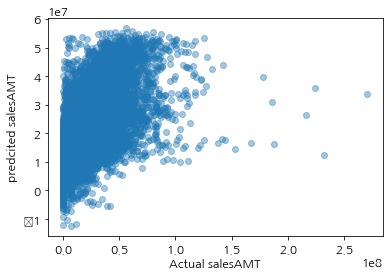

In [41]:
import matplotlib.pyplot as plt
plt.autoscale(enable=True)

plt.scatter(y_test,y_predict, alpha=0.4)
plt.xlabel('Actual salesAMT')
plt.ylabel('predcited salesAMT')
plt.show()

https://mindscale.kr/course/python-visualization-basic/grid

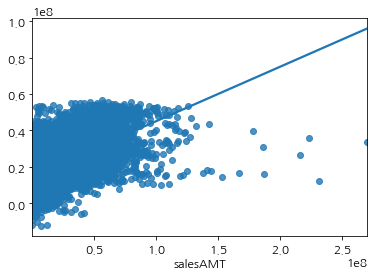

In [42]:
import seaborn as sns
sns.regplot(y_test,y_predict,ci=True)#신뢰구간

In [43]:
mlf.intercept_

array([7.49308498e+08])

In [44]:
mlf.coef_

array([[ 8.67291504e+05, -7.63917053e+03, -5.62014899e+00,
         3.31874972e+05,  7.01873052e+03,  4.30449273e+05,
         2.84615719e+05,  6.95816803e+05,  4.12644347e+06,
        -7.65895901e+06,  7.94220579e+06,  2.27185616e+07,
        -1.49125077e+06,  7.52839817e+06,  6.27320317e+06,
         1.82870571e+07, -2.02318218e+06,  5.37858137e+05,
        -1.01429444e+07,  5.83068964e+03]])

[groupby object를 dataframe으로](https://stackoverflow.com/questions/10373660/converting-a-pandas-groupby-output-from-series-to-dataframe)